In [1]:
import pandas as pd
import numpy as np
import os
pd.set_option('display.max_rows', 1000)

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

import matplotlib.pyplot as plt
import sys
sys.path.append("../")
from utils import createXYPlot
from utils import getVariables
from datetime import datetime

today = str(datetime.now().date())
print(today)
plots_folder = f"./plots/{today}/iss"
os.system(f"mkdir -p {plots_folder}")

2022-02-19


0

### Iss data

In [2]:
df_ti = pd.read_csv("./data/rapporti_ISS - TI.csv")
df_decessi = pd.read_csv("./data/rapporti_ISS - Decessi.csv")
df_ricoveri = pd.read_csv("./data/rapporti_ISS - Ricoveri.csv")
df_contagi = pd.read_csv("./data/rapporti_ISS - Contagi.csv")
df_pop = pd.read_csv("./data/rapporti_ISS - Popolazione.csv")

In [3]:
cols_to_select = [x for x in df_pop.columns if "frac" not in x and x != "cut"]
df_pop = df_pop[cols_to_select]
df_pop["data"] = pd.to_datetime(df_pop["data"]).dt.date
df_pop = df_pop.rename(columns={"data":"data_pop"})

In [4]:
df_dict = {
    "contagi": df_contagi,
    "ricoveri": df_ricoveri,
    "terapie_intensive": df_ti, 
    "decessi": df_decessi
}

In [5]:
for d in df_dict.items():
    d[1]["split"] = d[0]

In [6]:
df_iss = pd.concat(df_dict.values()).reset_index(drop=True)
df_iss["tot"] = df_iss["vax"] + df_iss["no_vax"]
df_iss["data"] = pd.to_datetime(df_iss["data"]).dt.date

In [8]:
df_iss.groupby("data").count()

fascia_eta  no_vax  1_dose  2_dosi_lt_cut  2_dosi_gt_cut  booster  \
data                                                                            
2021-10-17           5       5       5              5              5        5   
2021-10-24          15      15      15             15             15       15   
2021-10-31          15      15      15             15             15       15   
2021-11-07          20      20      20             20             20       20   
2021-11-14          20      20      20             20             20       20   
2021-11-21          20      20      20             20             20       20   
2021-11-28          20      20      20             20             20       20   
2021-12-05          20      20      20             20             20       20   
2021-12-12          20      20      20             20             20       20   
2021-12-19          20      20      20             20             20       20   
2021-12-26          20      20      20             20             20       20   
2022-01-02          20      20      20             20             20       20   
2022-01-09          20      20      20             20             20       20   
2022-01-16          20      20      20             20             20       20   
2022-01-23          20      20      20             20             20       20   
2022-01-30          15      15      15             15             15       15   
2022-02-06           5       5       5              5              5        5   
2022-02-13           5       5       5              5              5        5   

            vax  no_vax_frac  1_dose_frac  2_dosi_lt_cut_frac  \
data                                                            
2021-10-17    5            5            5                   5   
2021-10-24   15           15           15                  15   
2021-10-31   15           15           15                  15   
2021-11-07   20           20           20                  20   
2021-11-14   20           20           20                  20   
2021-11-21   20           20           20                  20   
2021-11-28   20           20           20                  20   
2021-12-05   20           20           20                  20   
2021-12-12   20           20           20                  20   
2021-12-19   20           20           20                  20   
2021-12-26   20           20           20                  20   
2022-01-02   20           20           20                  20   
2022-01-09   20           20           20                  20   
2022-01-16   20           20           20                  20   
2022-01-23   20           20           20                  20   
2022-01-30   15           15           15                  15   
2022-02-06    5            5            5                   5   
2022-02-13    5            5            5                   5   

            2_dosi_gt_cut_frac  booster_frac  vax_frac  cut  split  tot  
data                                                                     
2021-10-17                   5             5         5    5      5    5  
2021-10-24                  15            15        15   15     15   15  
2021-10-31                  15            15        15   15     15   15  
2021-11-07                  20            20        20   20     20   20  
2021-11-14                  20            20        20   20     20   20  
2021-11-21                  20            20        20   20     20   20  
2021-11-28                  20            20        20   20     20   20  
2021-12-05                  20            20        20   20     20   20  
2021-12-12                  20            20        20   20     20   20  
2021-12-19                  20            20        20   20     20   20  
2021-12-26                  20            20        20   20     20   20  
2022-01-02                  20            20        20   20     20   20  
2022-01-09                  20            20        20

In [9]:
age_values = df_iss["fascia_eta"].unique()
splits = df_iss["split"].unique()

In [10]:
from datetime import timedelta
df_iss["data_pop"] = df_iss["data"].apply(lambda x: x - timedelta(14))

In [11]:
df_iss = df_iss.merge(df_pop, on=["data_pop","fascia_eta"], how="left", suffixes=("","_pop"))

### Incidence

In [12]:
vnames = ["no_vax", "vax"]
for v in vnames:
    df_iss[f"{v}_100k"] = (1e5)*df_iss[v]/df_iss[f"{v}_pop"]
df_iss["eff"] = 100*(1 - df_iss[f"vax_100k"]/df_iss[f"no_vax_100k"])

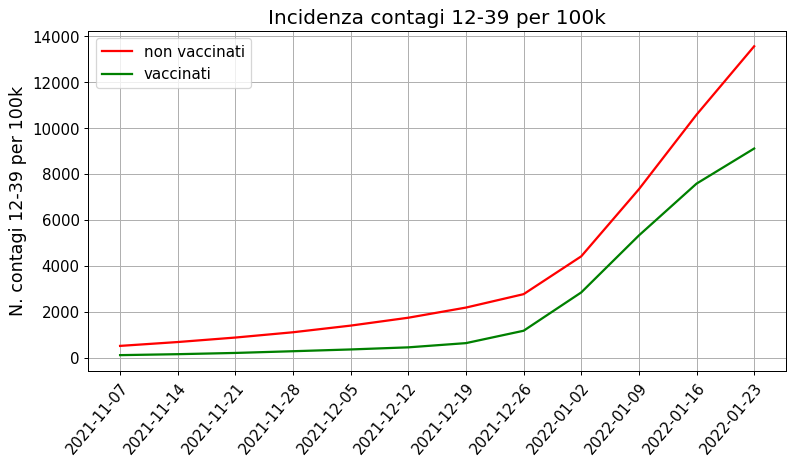

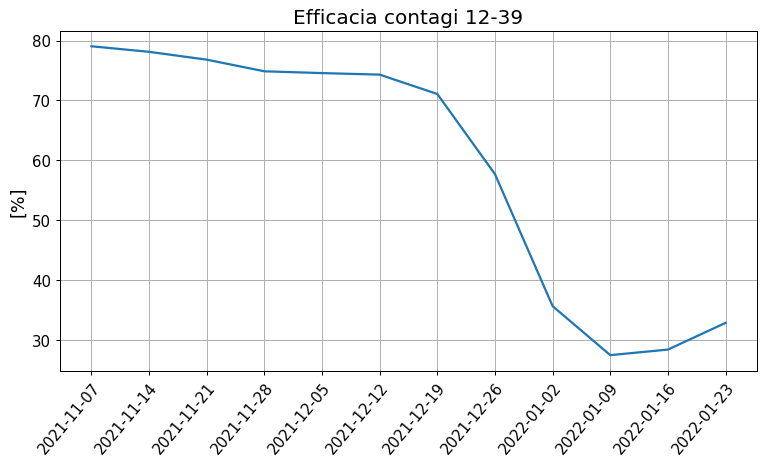

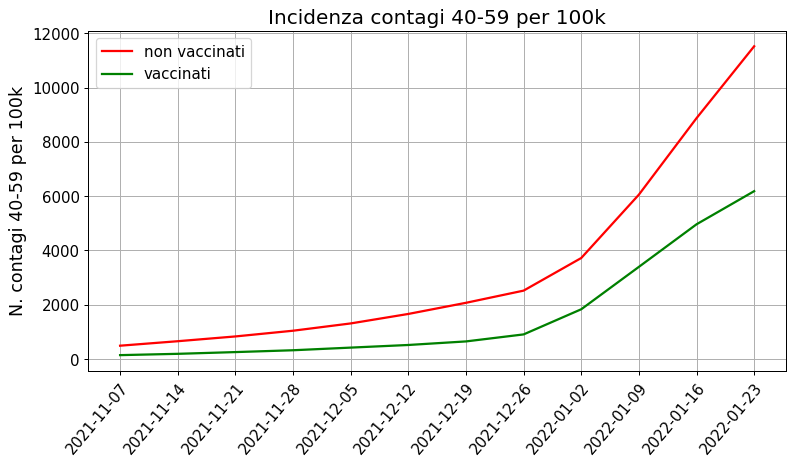

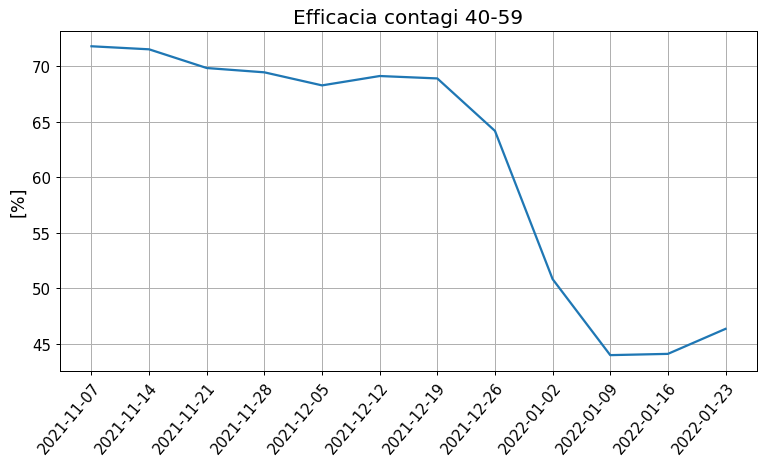

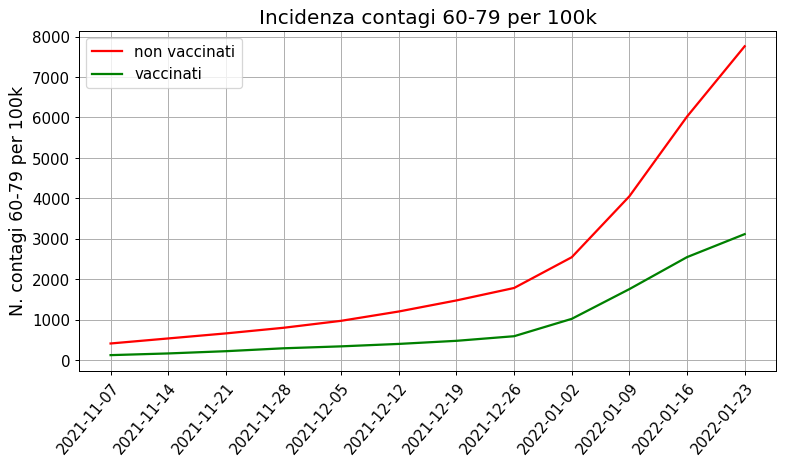

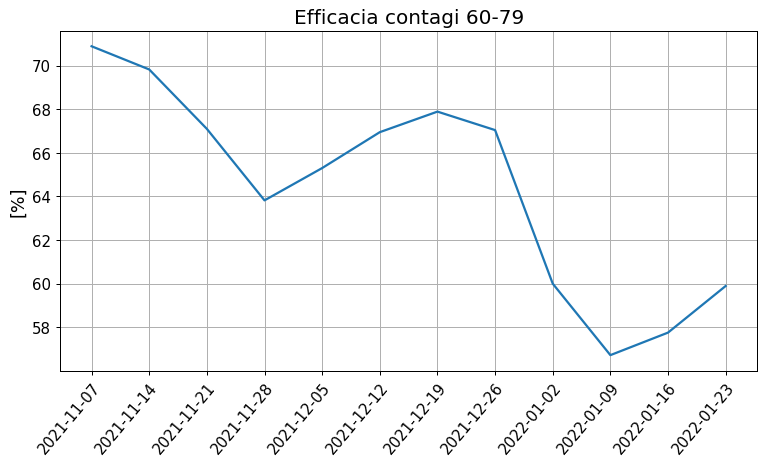

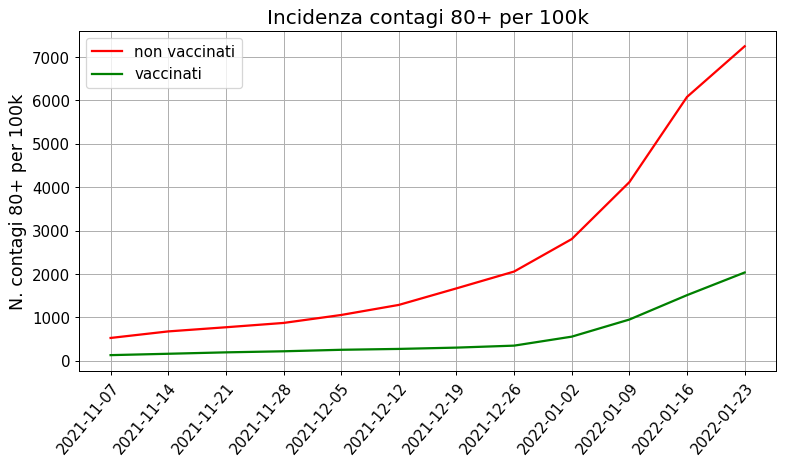

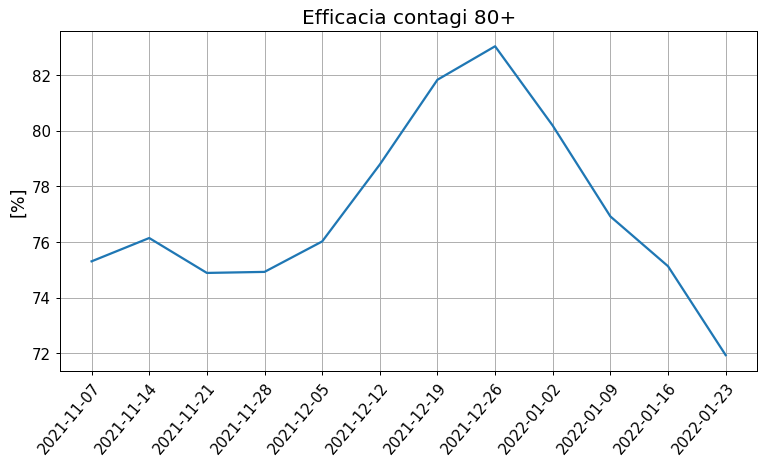

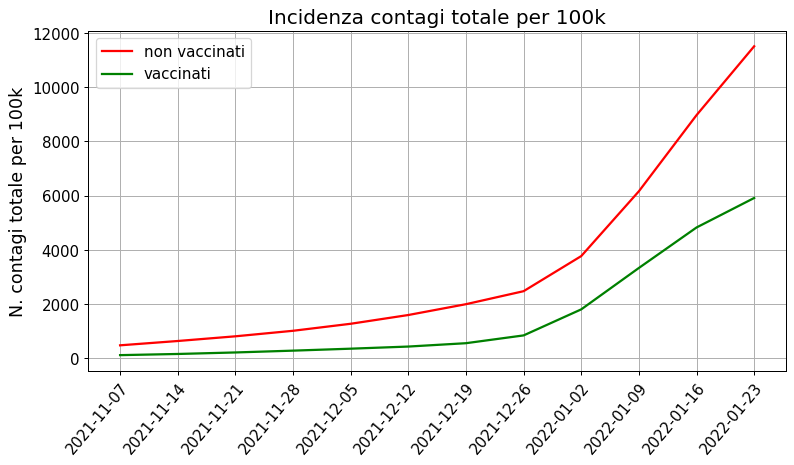

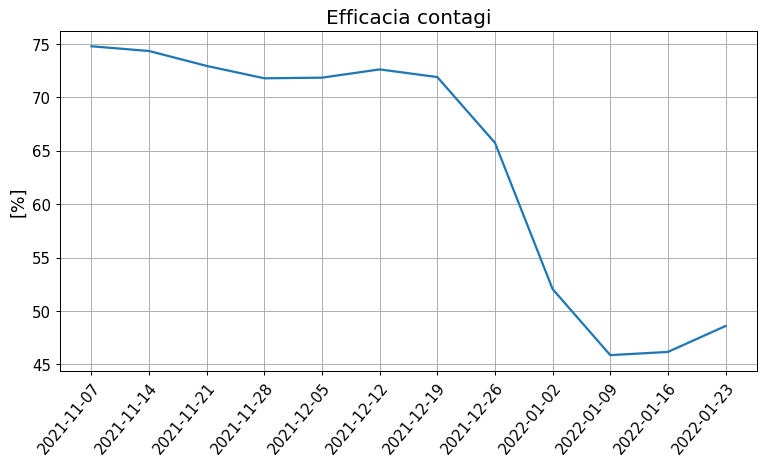

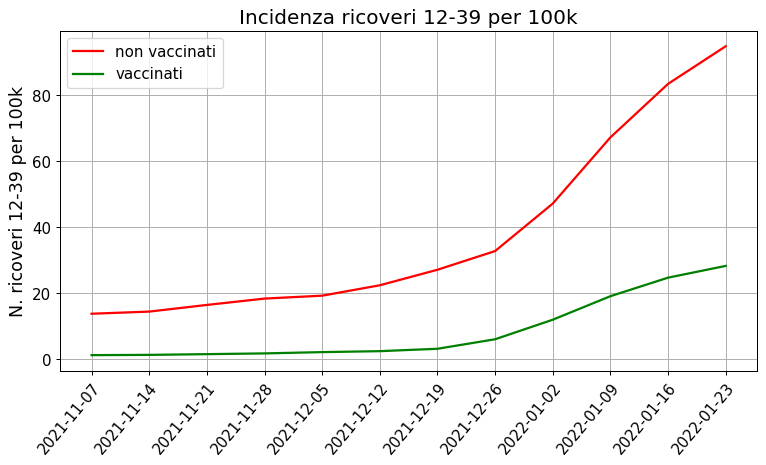

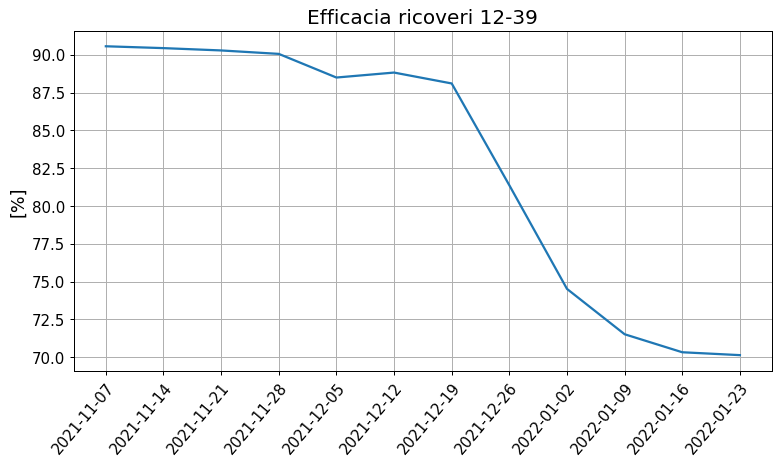

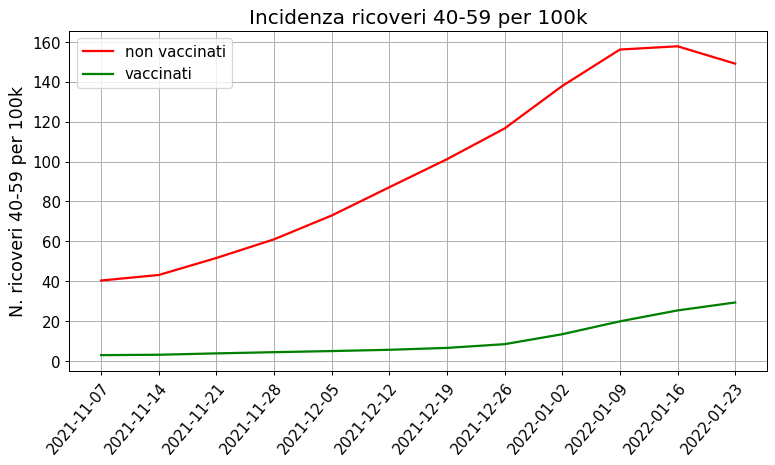

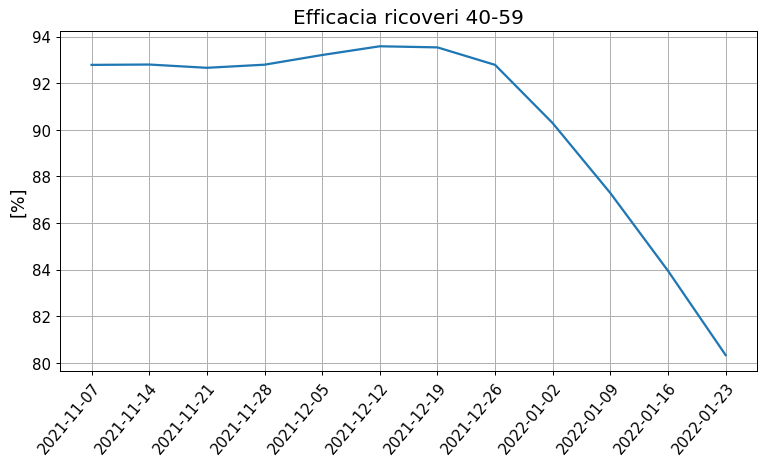

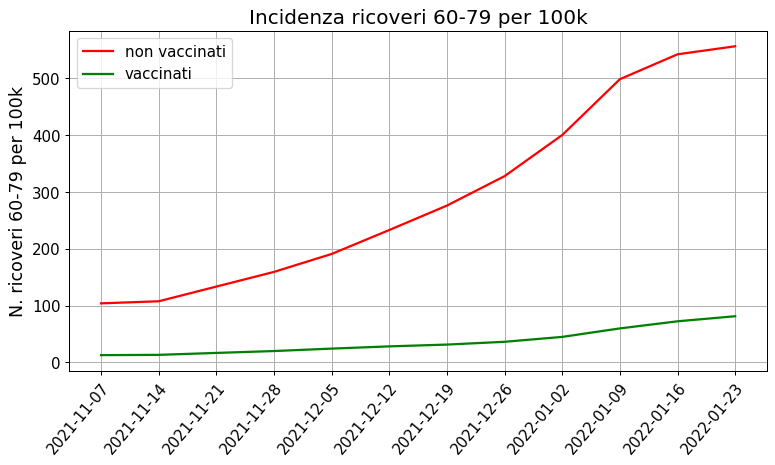

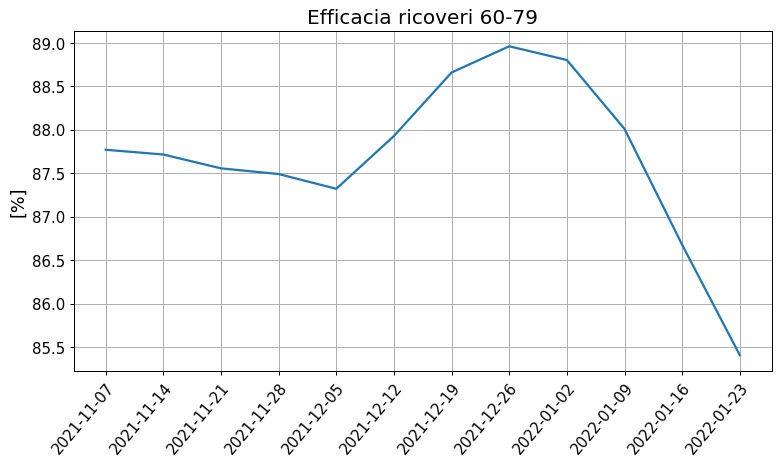

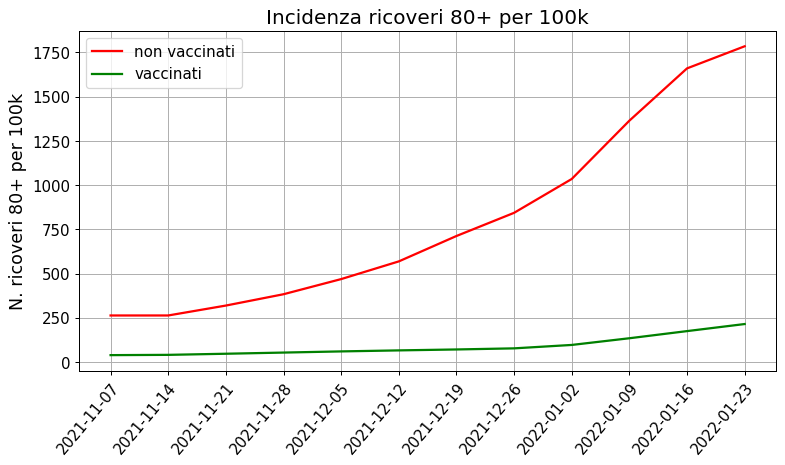

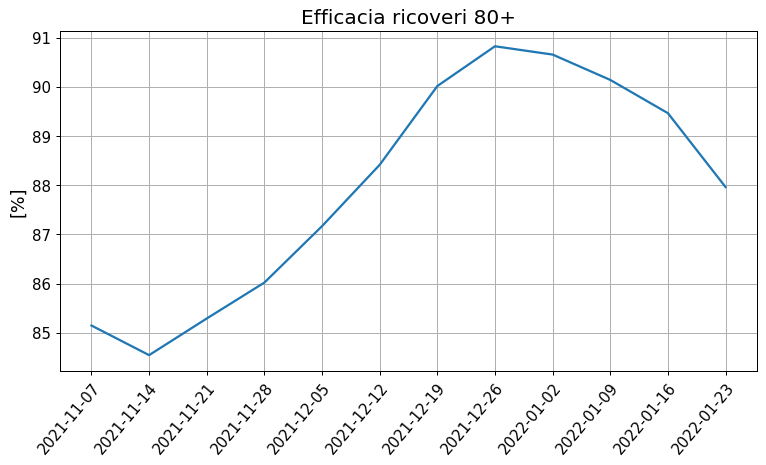

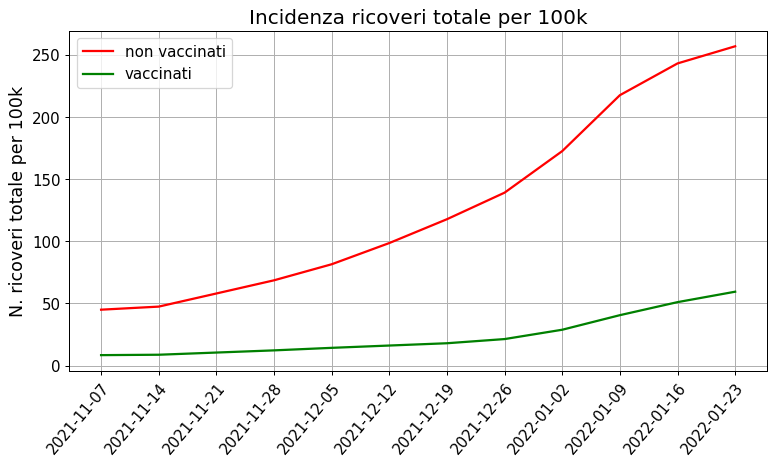

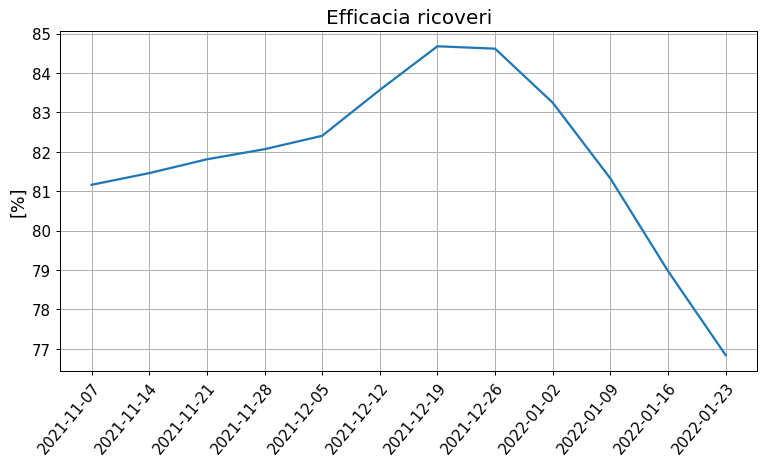

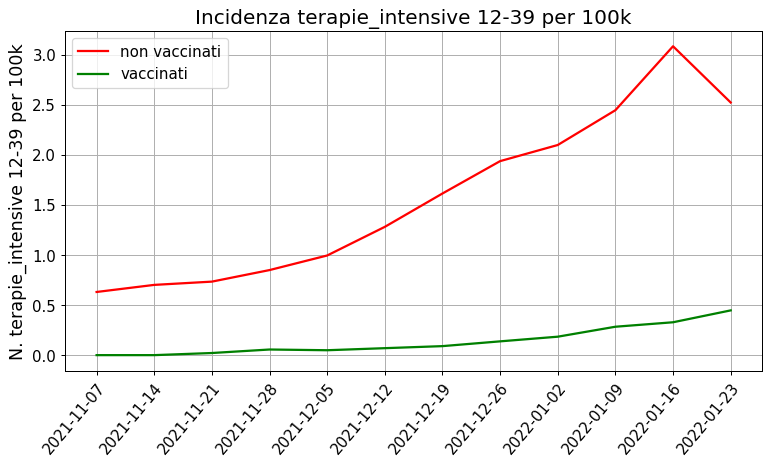

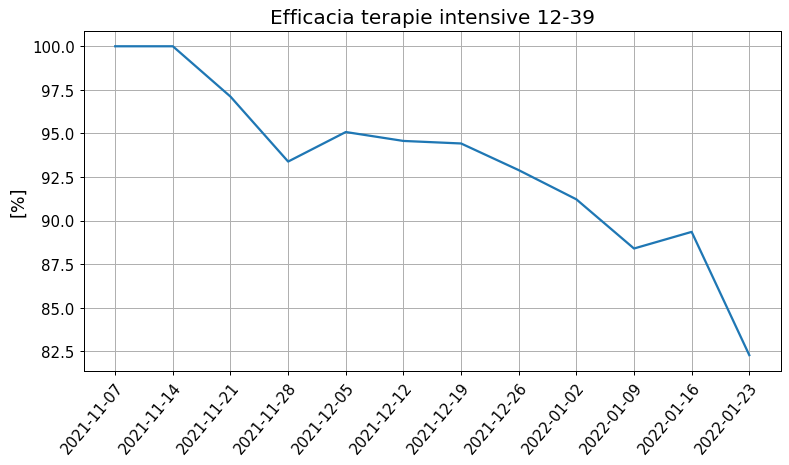

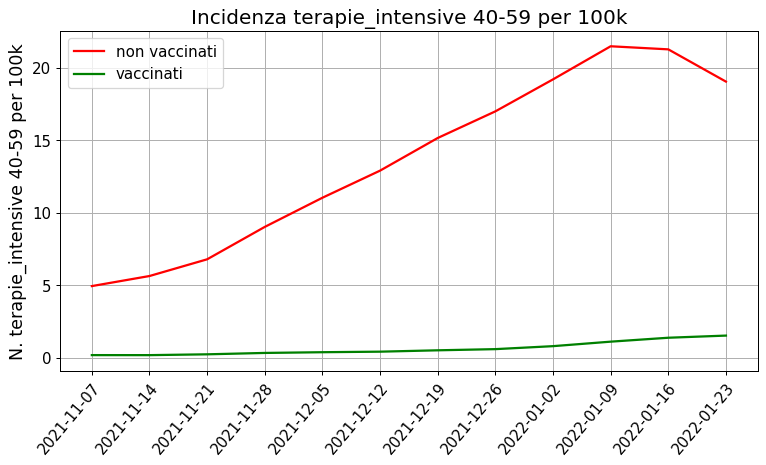

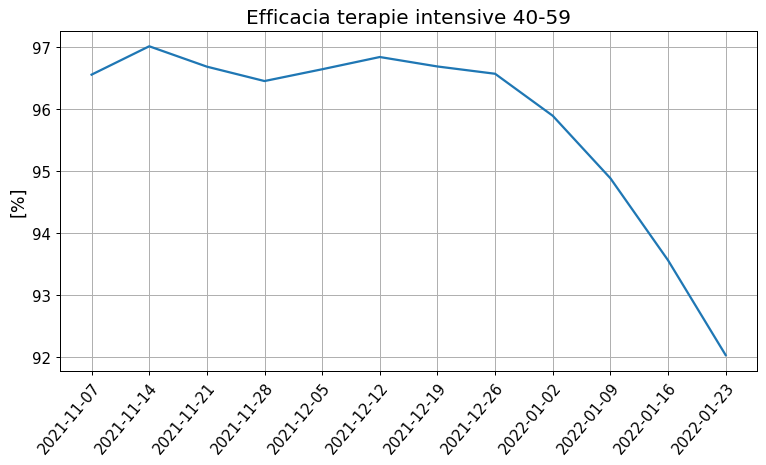

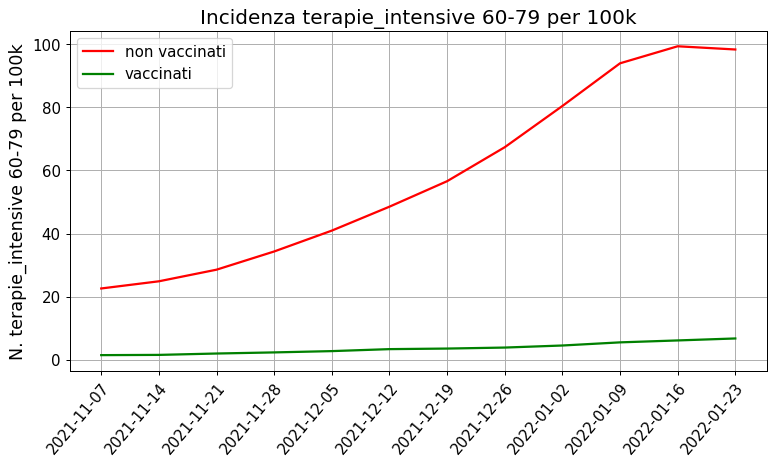

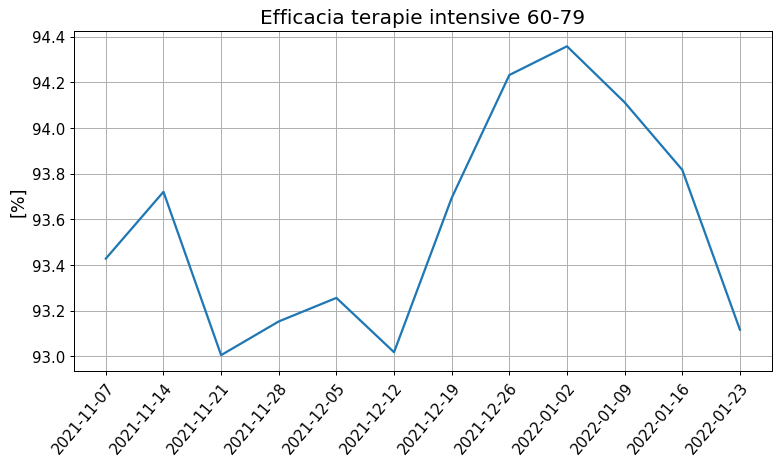

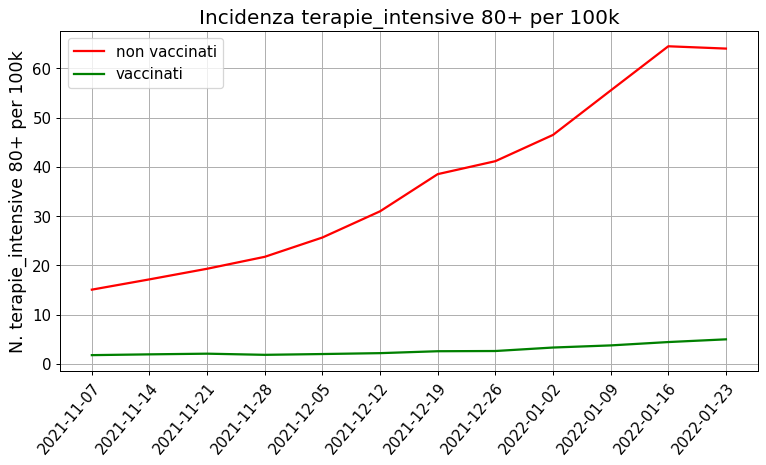

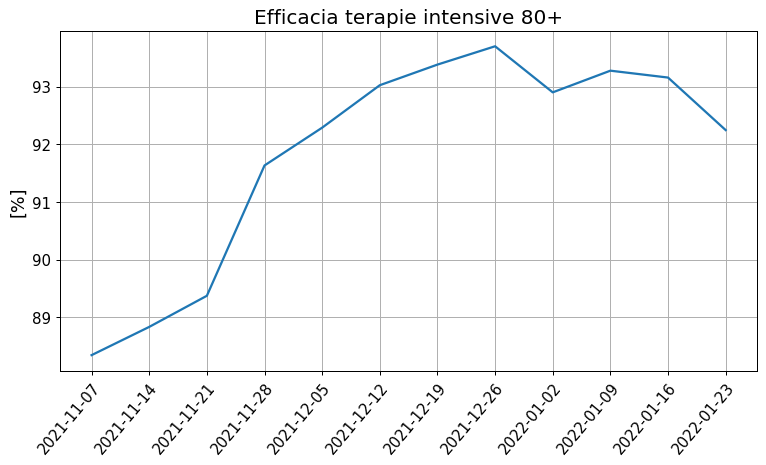

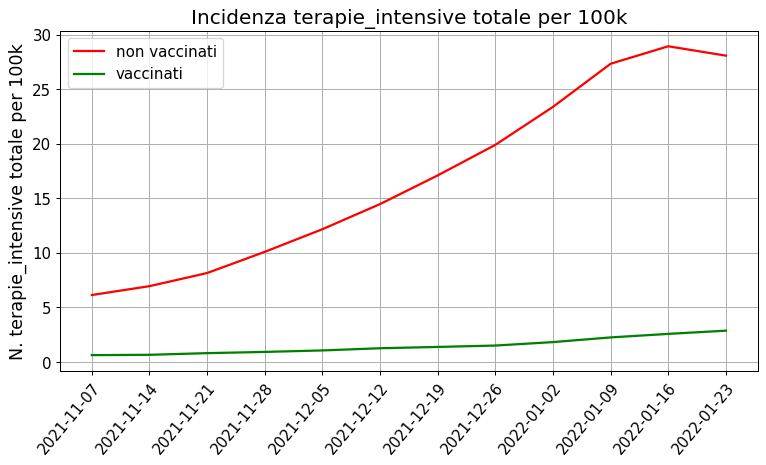

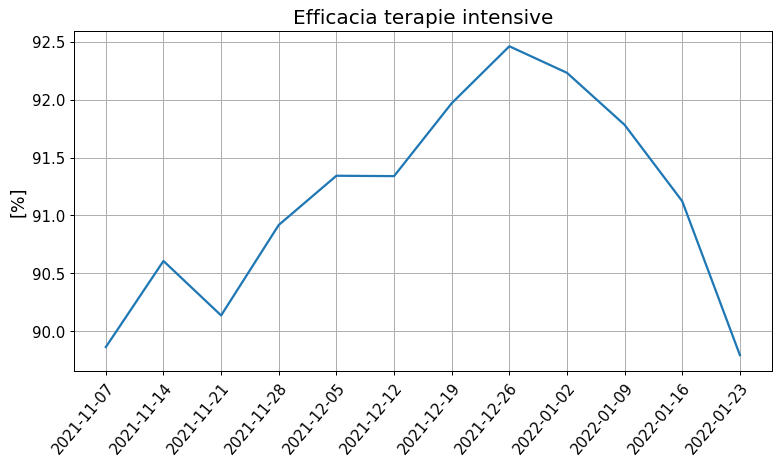

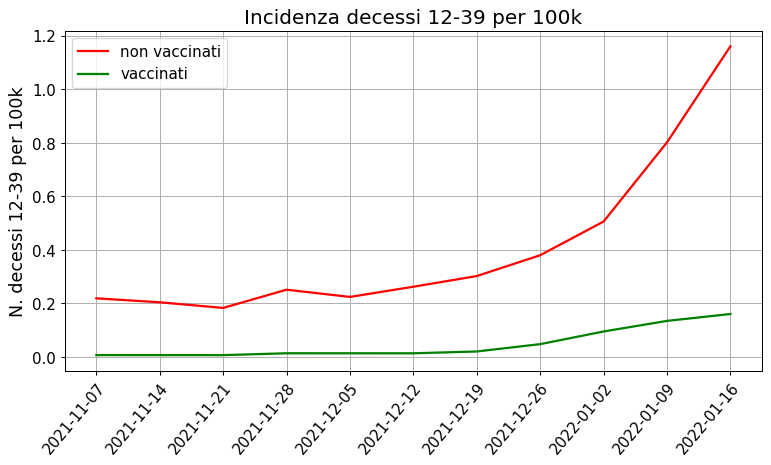

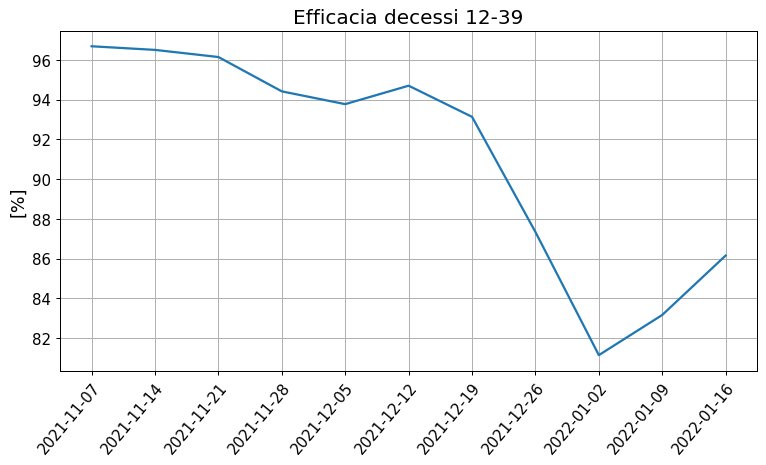

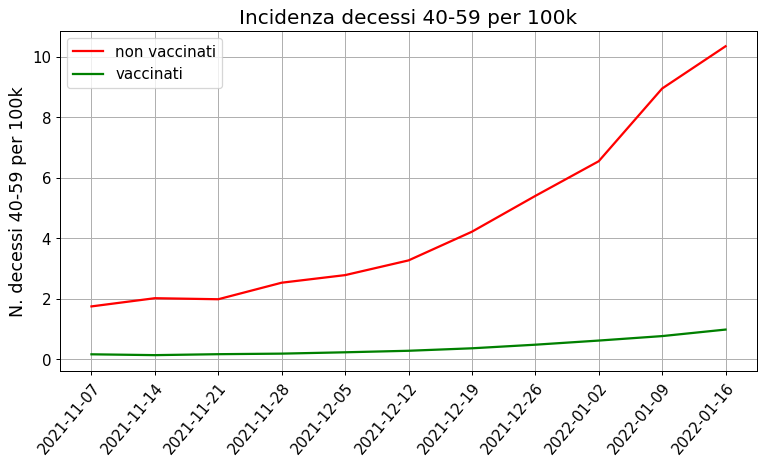

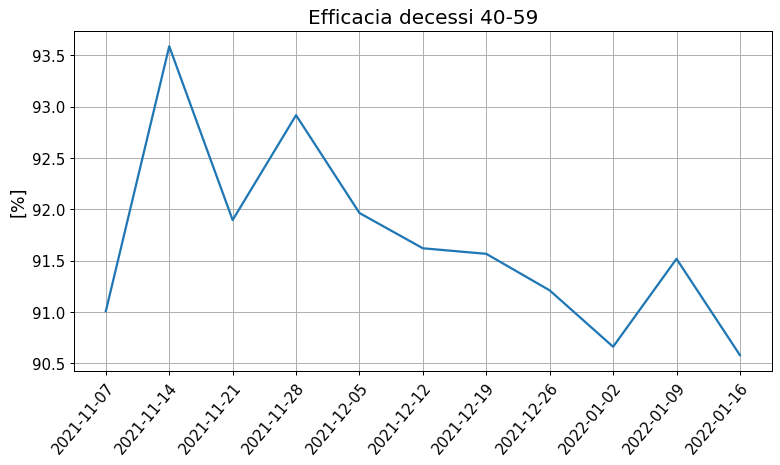

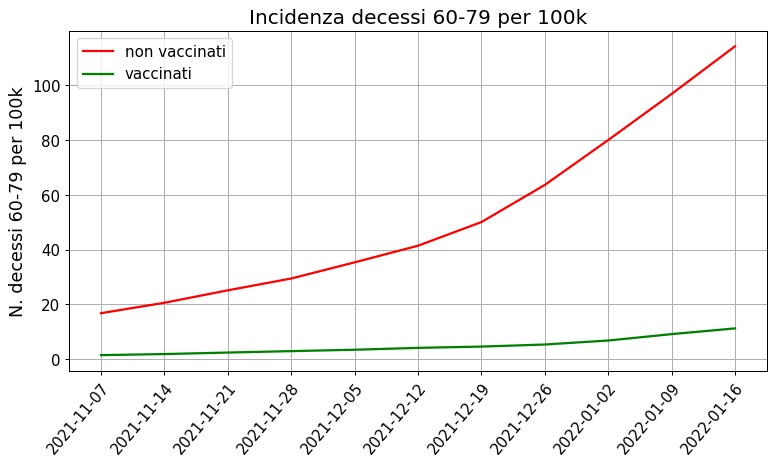

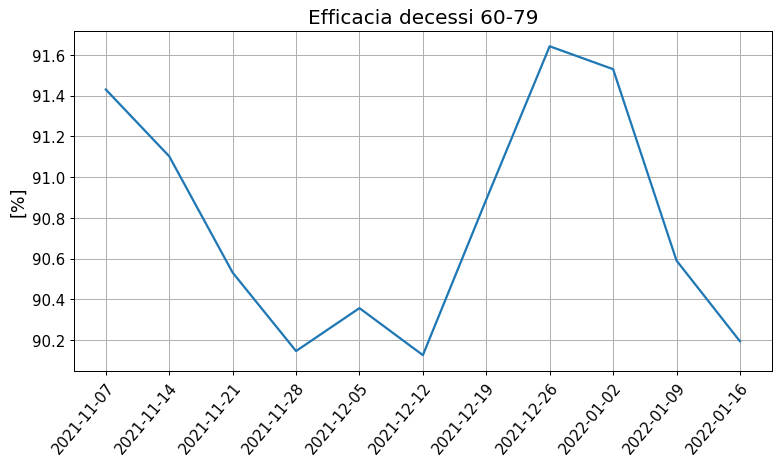

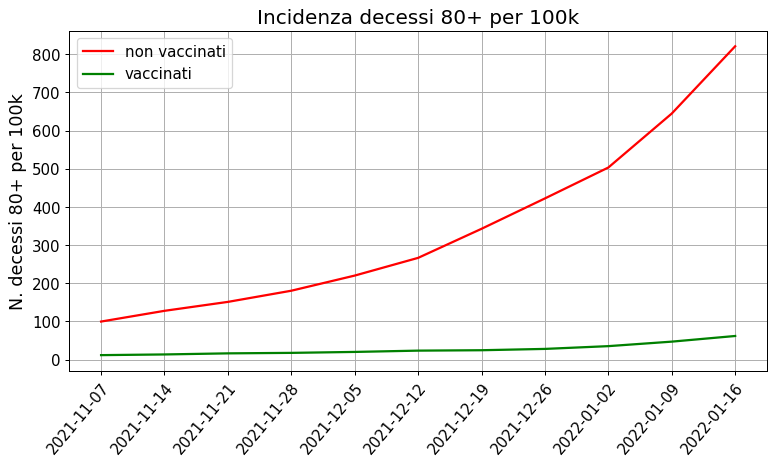

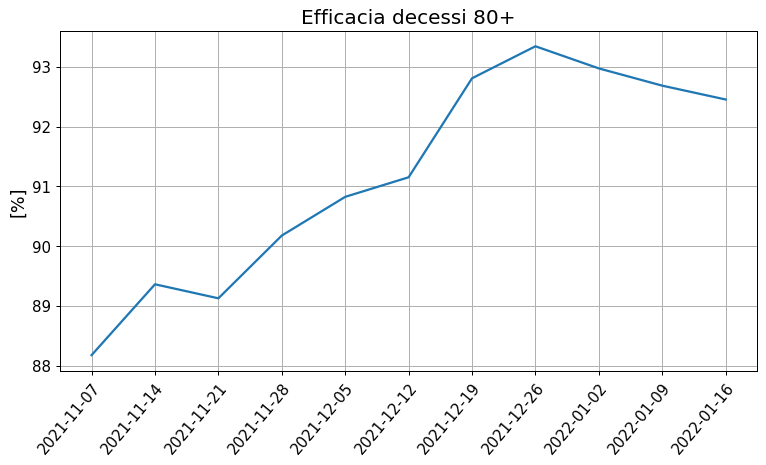

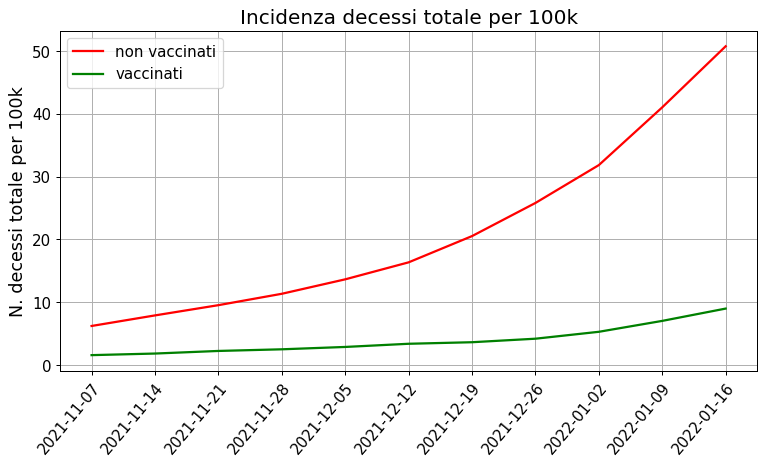

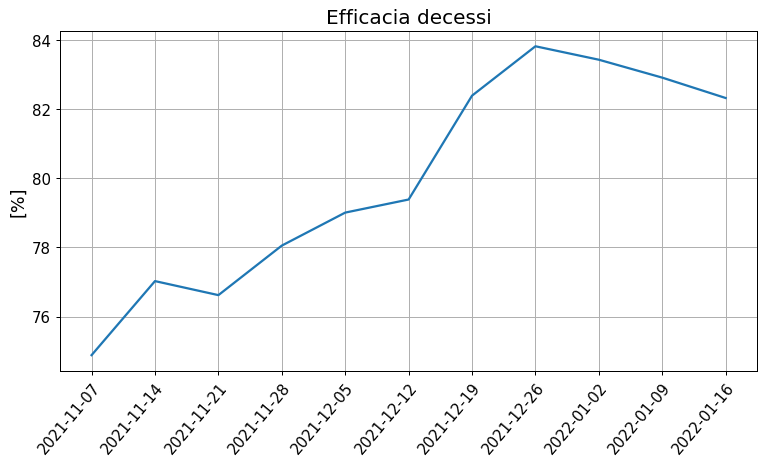

In [13]:
for s in ["contagi","ricoveri","terapie_intensive","decessi"]:
    for eta in df_iss.fascia_eta.unique():
        df_plt = df_iss[(df_iss.split==s) & (df_iss.fascia_eta==eta)]
        #display(df_plt[["data","no_vax_100k","vax_100k"]])
        df_plt = df_plt.dropna()
        vplot = [f"{v}_100k" for v in vnames]
        createXYPlot(df_plt,
                     x="data",
                     y=vplot,
                     colors=["r","g"],
                     labels=["non vaccinati", "vaccinati"],
                     plots_folder=plots_folder,
                     title=f"Incidenza {s} {eta} per 100k",
                     figsize_x=10,
                     figsize_y=5,
                     dpis=90,
                     ytitle=f"N. {s} {eta} per 100k",
                     savename=f"{s}_{eta}_per_100k",
                     linewidth=1.8,
                     days_interval=1)
    
        createXYPlot(df_plt,
                     x="data",
                     y=["eff"],
                     plots_folder=plots_folder,
                     title=f"Efficacia {s} {eta}".replace("_"," ").replace(" totale",""),
                     figsize_x=10,
                     figsize_y=5,
                     dpis=90,
                     linewidth=1.8,
                     ytitle="[%]",
                     savename=f"efficacia_{s}_{eta}",
                     days_interval=1)

In [14]:
#df_iss[["data","fascia_eta","eff","no_vax_pop","vax_pop","split"]]

In [15]:
def plot_vax_vs_no_vax(age: str, 
                       split: str):
    
    plt.figure(dpi=100, figsize=(10,5))
    df_plt = df_iss[(df_iss.fascia_eta==age) & (df_iss.split==split)].reset_index()
    title = f"{split}"
    if age != "totale":
        title += f" {age}"
    createXYPlot(df_plt,
                 y=["no_vax_frac"],
                 labels=["frazione non vaccinati"],
                 colors=["r"],
                 x="data",
                 plots_folder="./plots",
                 days_interval=1,
                 linewidth=1.8,
                 title=title.replace("_"," ")
                )

<Figure size 1000x500 with 0 Axes>

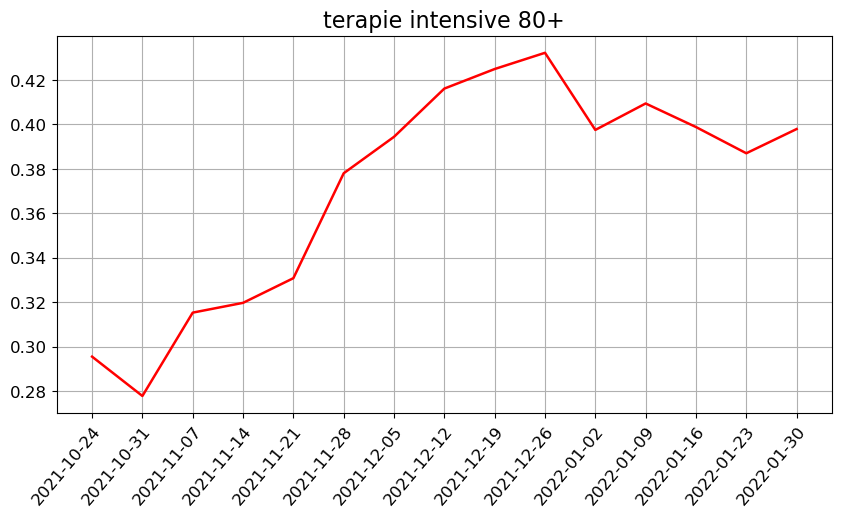

In [16]:
plot_vax_vs_no_vax("80+", "terapie_intensive")

In [17]:
df_iss["no_vax_frac_err"] = 1.645*np.sqrt((df_iss["no_vax_frac"]*df_iss["vax_frac"])/(df_iss["no_vax"] + df_iss["vax"]))
df_iss["no_vax_frac_err_lo"] = df_iss["no_vax_frac"] - df_iss["no_vax_frac_err"]
df_iss["no_vax_frac_err_hi"] = df_iss["no_vax_frac"] + df_iss["no_vax_frac_err"]

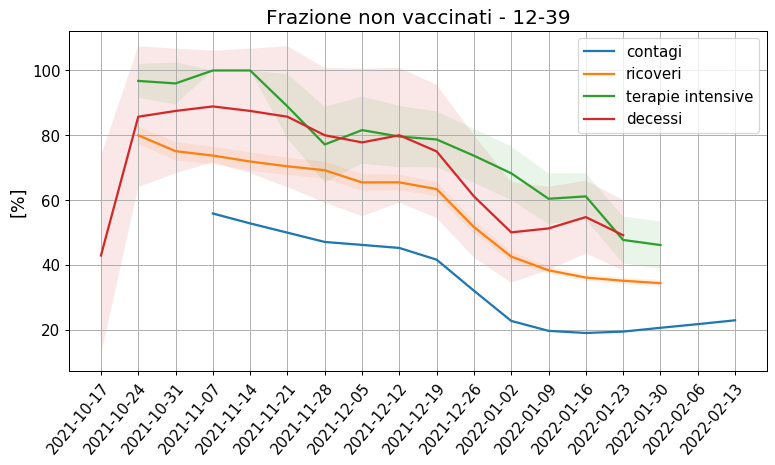

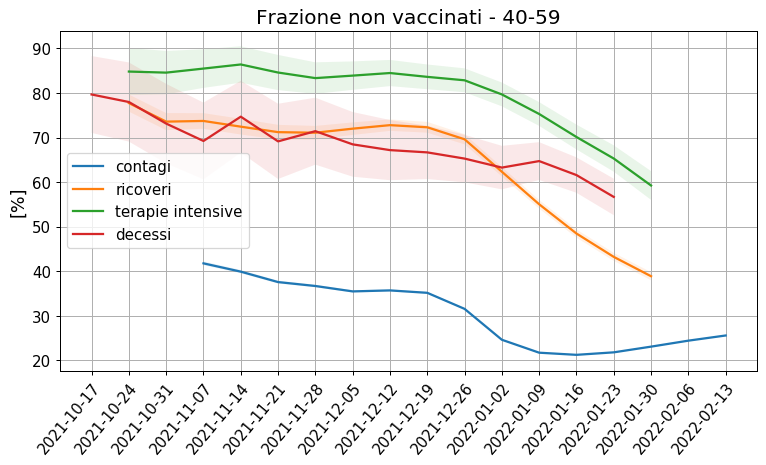

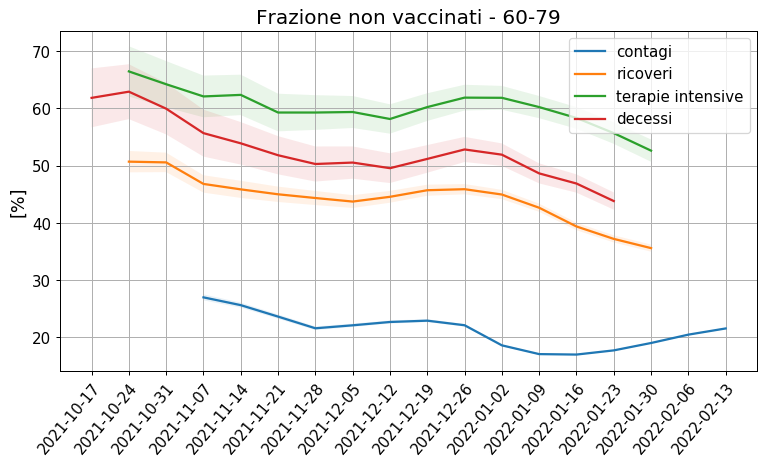

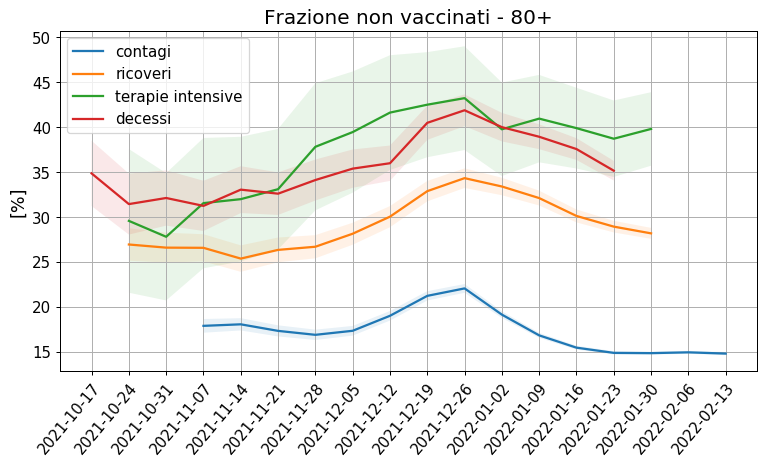

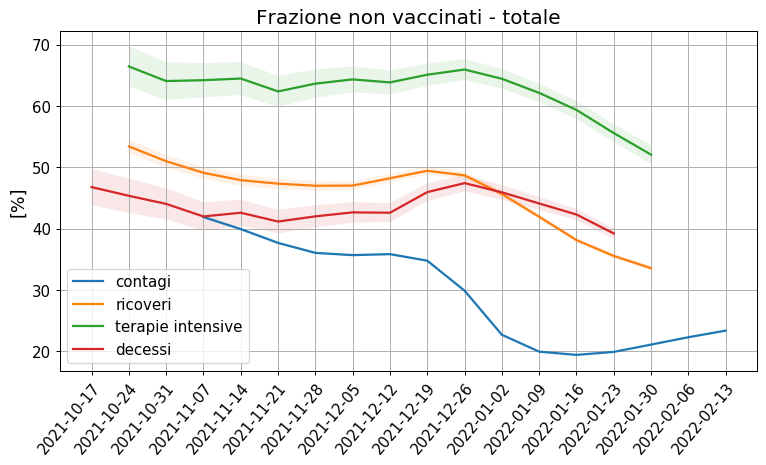

In [18]:
for age in sorted(age_values):
    plt.figure(dpi=90, figsize=(10,5))
    dates_str = []
    dates = []
    for split in ["contagi", "ricoveri", "terapie_intensive", "decessi"]:
        df_plt = df_iss[(df_iss.fascia_eta==age) & (df_iss.split==split)]
        dates_str += [x.strftime("%Y-%m-%d") for x in df_plt.data.unique()]
        dates += [x for x in df_plt.data.unique()]
        plt.plot(df_plt.data,
                 100*df_plt.no_vax_frac,
                 label=split.replace("_"," "),
                 linewidth=1.8
                )
        plt.fill_between(df_plt.data, 
                     100*df_plt.no_vax_frac_err_lo, 
                     100*df_plt.no_vax_frac_err_hi,
                     alpha=0.1
                    )
    title = f"Frazione non vaccinati - {age}"
    plt.title(title, fontsize=16)
    plt.grid()
    plt.legend(fontsize=12)
    plt.yticks(fontsize=12)
    plt.ylabel("[%]",fontsize=14)
    
    dates_str = sorted(list(set(dates_str)), reverse=False)
    dates = sorted(list(set(dates)), reverse=False)
    plt.xticks(dates,
               dates_str,
               fontsize=12,
               rotation=50, 
               rotation_mode="anchor", 
               verticalalignment = "top",
               horizontalalignment = "right")
    plt.savefig(f"{plots_folder}/frazione_no_vax_{age}",bbox_inches="tight")

In [19]:
def plot_var_ages(split, varname="vax"):
    plt.figure(dpi=90, figsize=(10,5))
    for age in sorted(age_values):
        df_plt = df_iss[(df_iss.fascia_eta==age) & (df_iss.split=="terapie_intensive")]
        plt.plot(df_plt.data,
            df_plt[varname],
            label=age,
            linewidth=1.8)
    title = f"Totale {varname} {split}".replace("_", " ")
    plt.title(title, fontsize=16)
    plt.grid()
    plt.legend(fontsize=12)
    plt.yticks(fontsize=12)
    plt.xticks(df_plt.data,
               fontsize=12,
               rotation=50, 
               rotation_mode="anchor", 
               verticalalignment = "top",
               horizontalalignment = "right"
              )

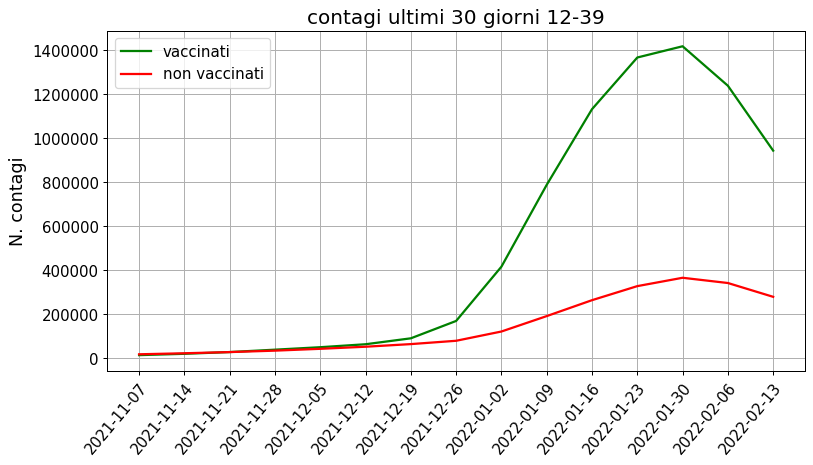

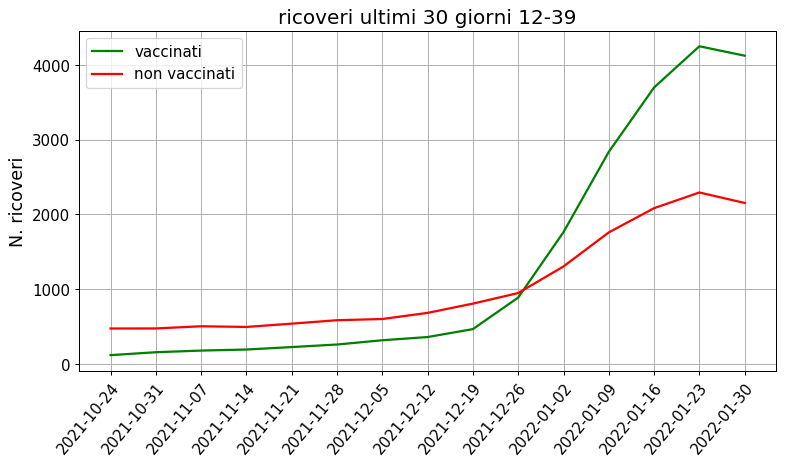

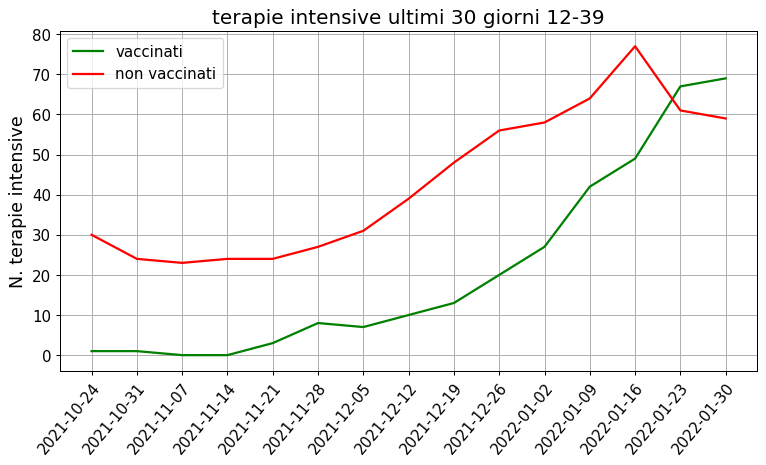

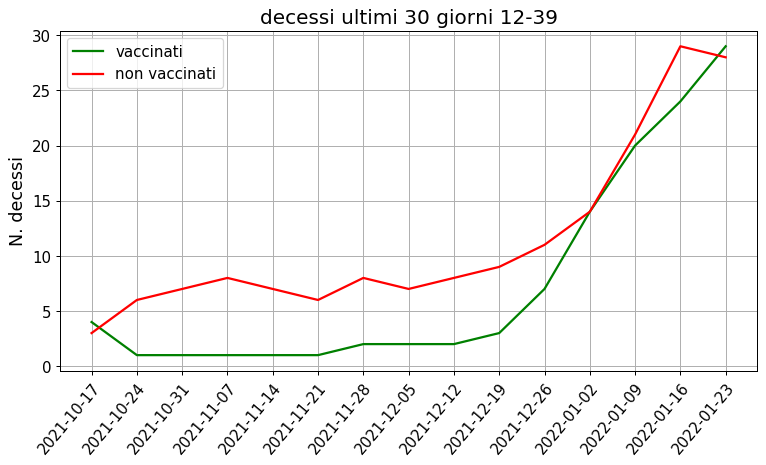

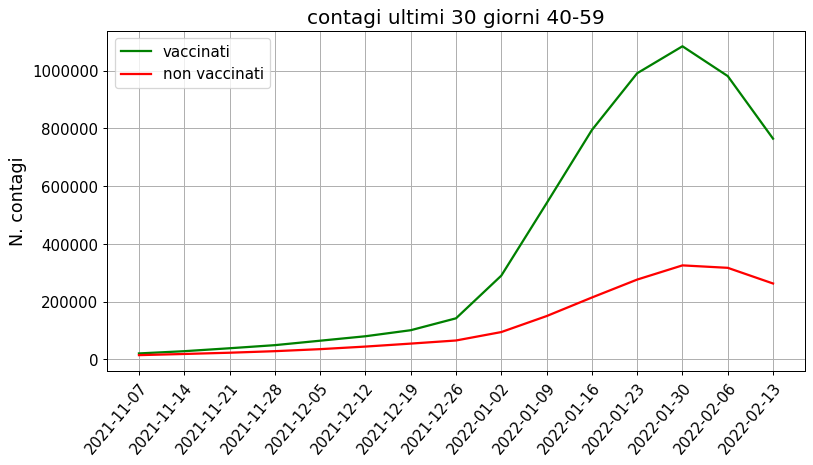

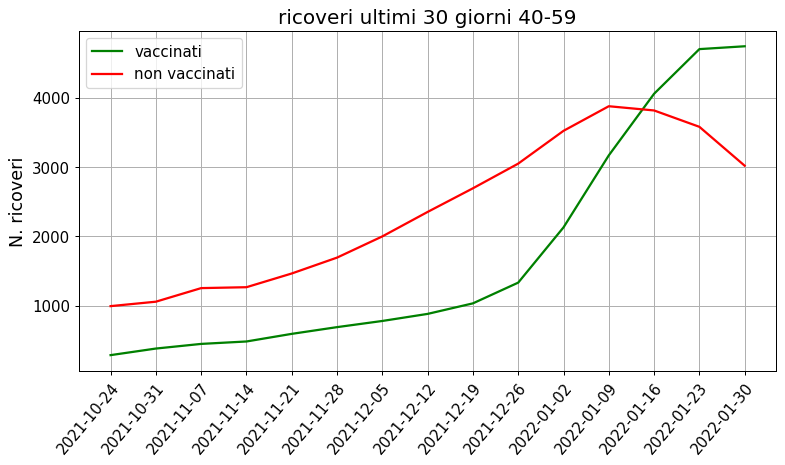

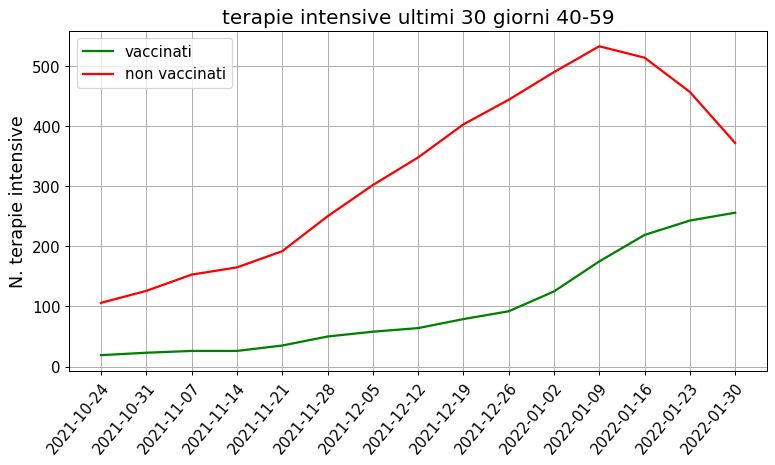

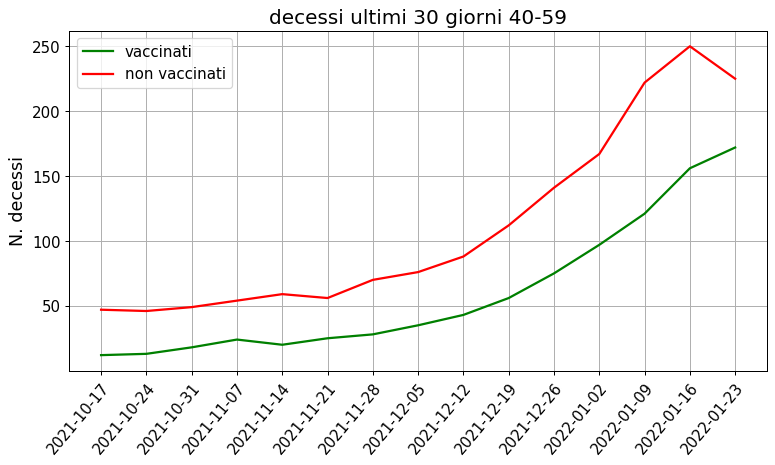

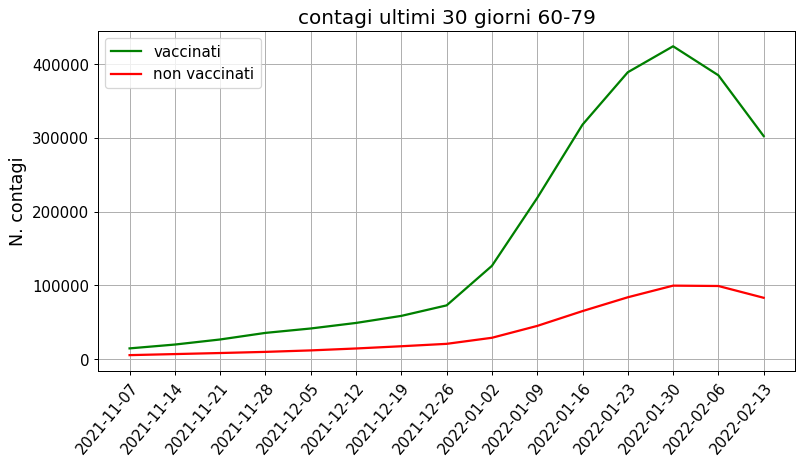

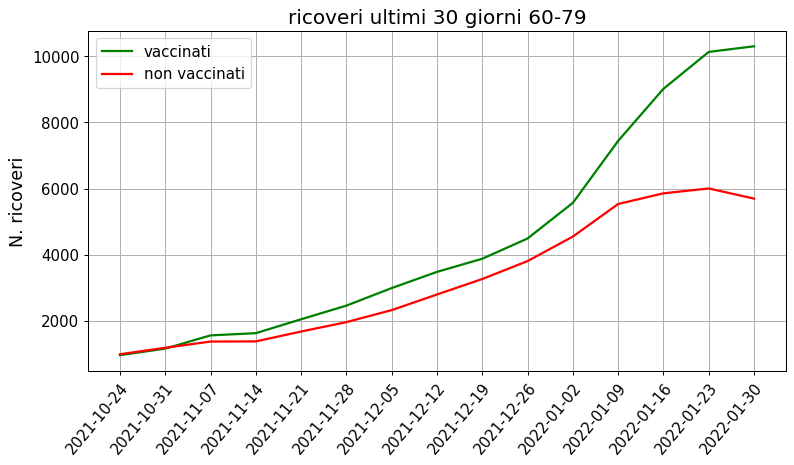

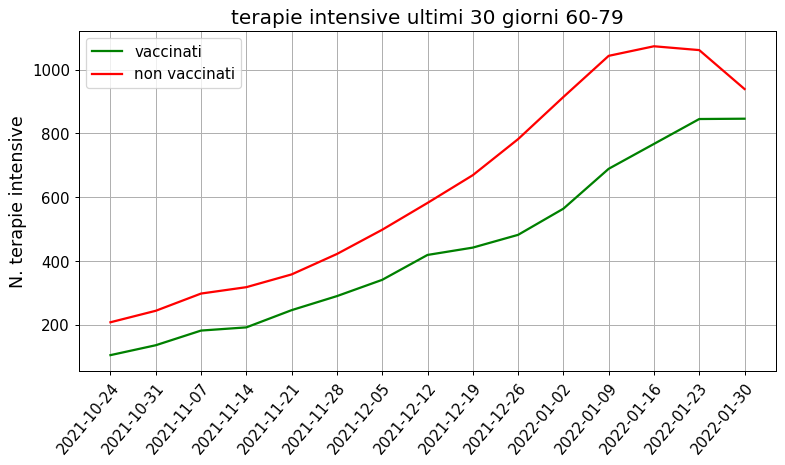

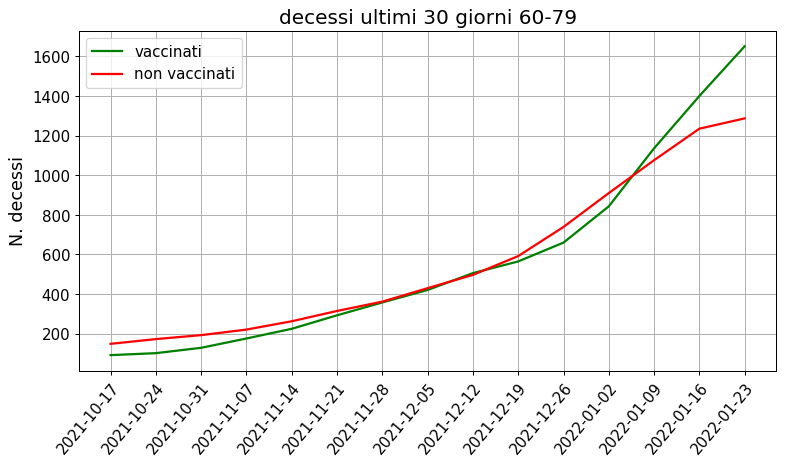

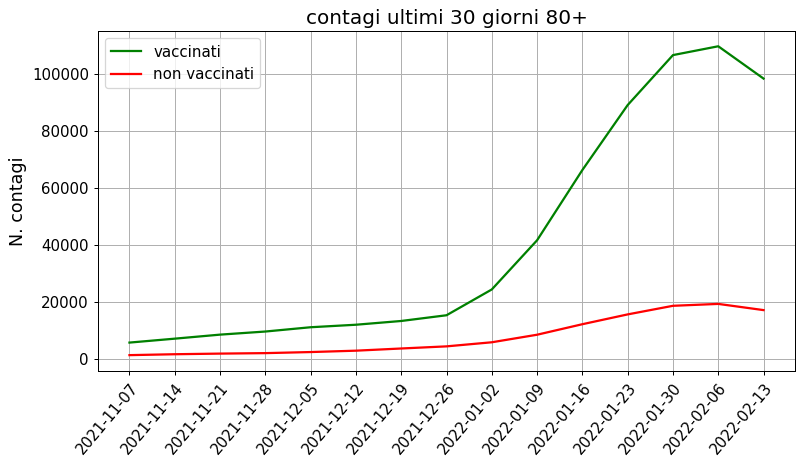

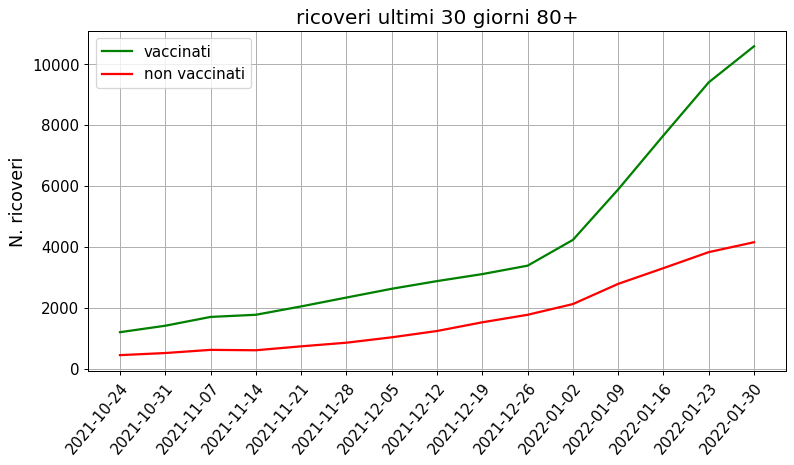

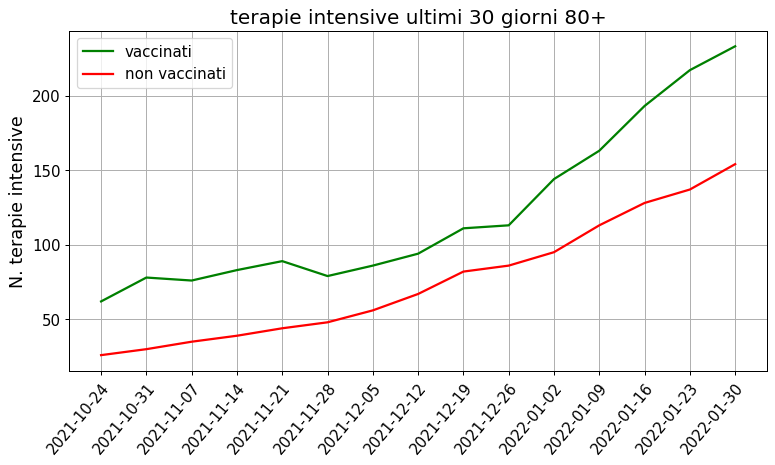

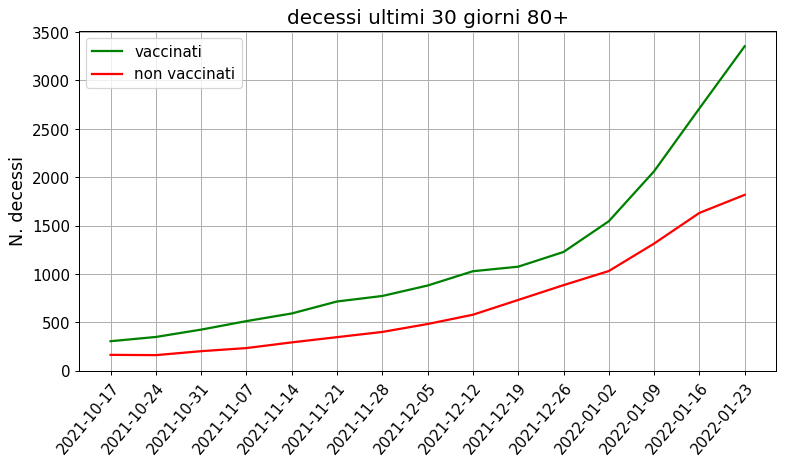

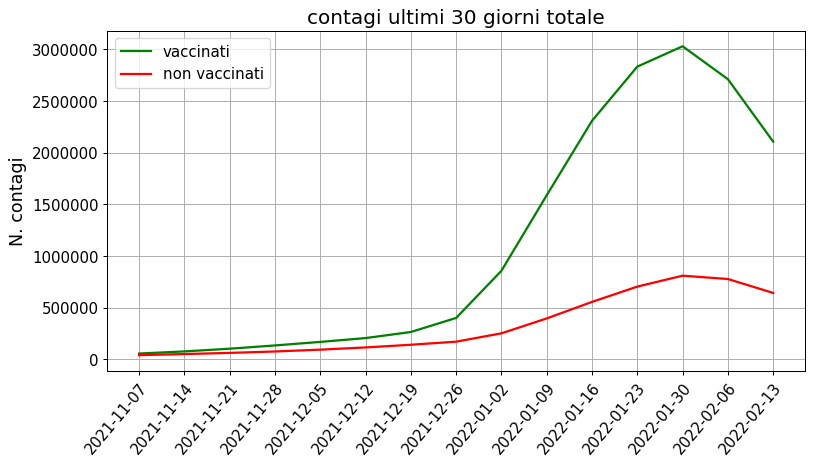

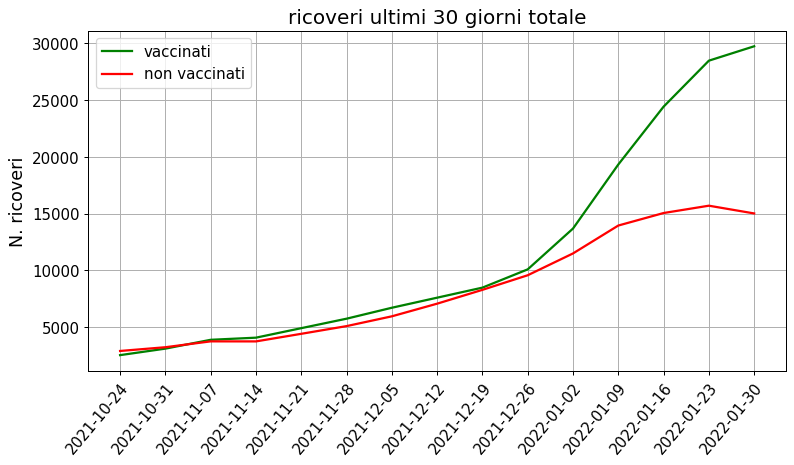

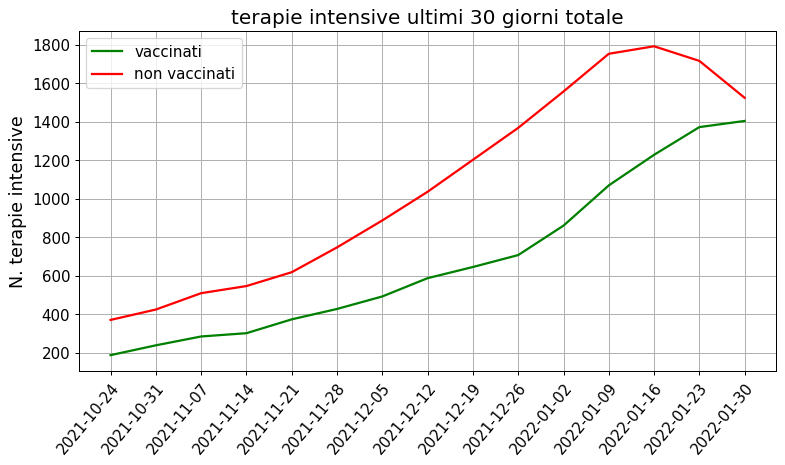

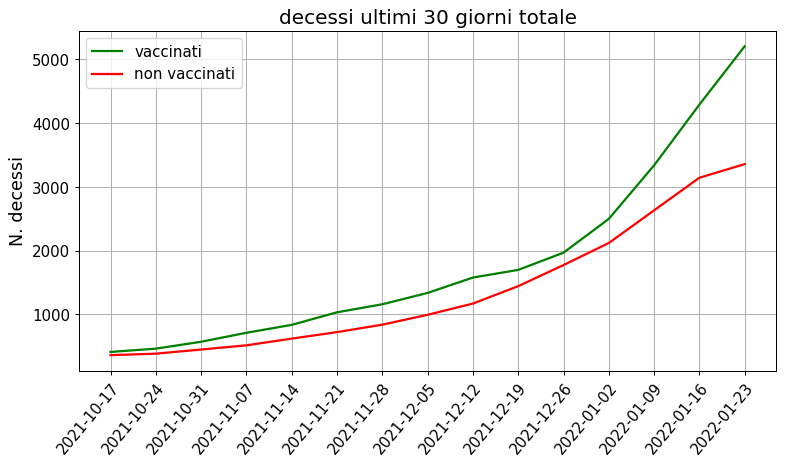

In [20]:
for age in age_values:
    for split in splits:
        df_plt = df_plt = df_iss[(df_iss.fascia_eta==age) & (df_iss.split==split)]
        savename = f"{split}_{age}"
        yvars = ["vax", "no_vax"]
        savename += "_" + "_".join(yvars)
        createXYPlot(df_plt,
                     y=yvars,
                     x="data",
                     labels=["vaccinati", "non vaccinati"],
                     colors=["g","r"],
                     plots_folder=plots_folder,
                     linewidth=1.8,
                     days_interval=1,
                     title=f"{split} ultimi 30 giorni {age}".replace("_"," "),
                     savename=savename,
                     ytitle=f"N. {split}".replace("_"," "),
                     figsize_x=10,
                     figsize_y=5,
                     dpis=90
                    )

In [21]:
def get_lethality(df: pd.DataFrame, 
                  age: str,
                  savename: str,
                  title: str,
                  yscale: str ="linear",
                  num_den: tuple = ("decessi","contagi"),
                 ):

    value_cols = ["vax",
                  "no_vax",
                  "1_dose",
                  "2_dosi_lt_cut",
                  "2_dosi_gt_cut",
                  "booster",
                 ]
    df_pivot = df.pivot(index='data',columns=["split"],values=value_cols)
    cols = []
    for i in range(0,len(df_pivot.columns)):
        cols.append(df_pivot.columns.get_level_values(1)[i] + '_' + df_pivot.columns.get_level_values(0)[i])
    df_pivot.columns = cols
    
    #display(df_pivot)
    for v in value_cols:
        df_pivot[f"letalita_{v}"] = df_pivot[f"{num_den[0]}_{v}"]/df_pivot[f"{num_den[1]}_{v}"]
        df_pivot[f"sd_letalita_{v}"] = np.sqrt(df_pivot[f"letalita_{v}"] * (1 - df_pivot[f"letalita_{v}"]) / df_pivot[f"contagi_{v}"])
        df_pivot[f"lo_err_letalita_{v}"] = df_pivot[f"letalita_{v}"] - 1.645 * df_pivot[f"sd_letalita_{v}"]
        df_pivot[f"hi_err_letalita_{v}"] = df_pivot[f"letalita_{v}"] + 1.645 * df_pivot[f"sd_letalita_{v}"]
        df_pivot[f"lo_err_letalita_{v}"] = df_pivot[f"lo_err_letalita_{v}"].apply(lambda x: 0 if x < 0 else x)
    
    dates = df_pivot[[f"{num_den[0]}_no_vax",f"{num_den[1]}_no_vax"]].dropna().index
    plt.figure(figsize=(10,5),dpi=90)
    for y in ["no_vax", "1_dose", "2_dosi_lt_cut", "2_dosi_gt_cut", "booster"]:
        
        plt.plot(df_pivot.index, 
                 100*df_pivot[f"letalita_{y}"],
                 label=y,
                 linewidth=1.8
                )
        plt.fill_between(df_pivot.index, 
                     100*df_pivot[f"lo_err_letalita_{y}"], 
                     100*df_pivot[f"hi_err_letalita_{y}"],
                     alpha=0.1
                    )
    plt.grid()
    plt.legend(fontsize=12)
    plt.title(f"{title} -- {age} -- dati ISS",fontsize=19)
    plt.ylabel(f"{num_den[0]} / {num_den[1]} [%]",fontsize=14)
    _ = plt.yticks(fontsize=13)
    _ = plt.xticks(dates,
                   fontsize=13,
                   rotation=50, 
                   rotation_mode="anchor", 
                   verticalalignment = "top",
                   horizontalalignment = "right"
                  )
    plt.yscale(yscale)
    plt.savefig(f"{plots_folder}/{savename}.png", bbox_inches="tight")
    return df_pivot

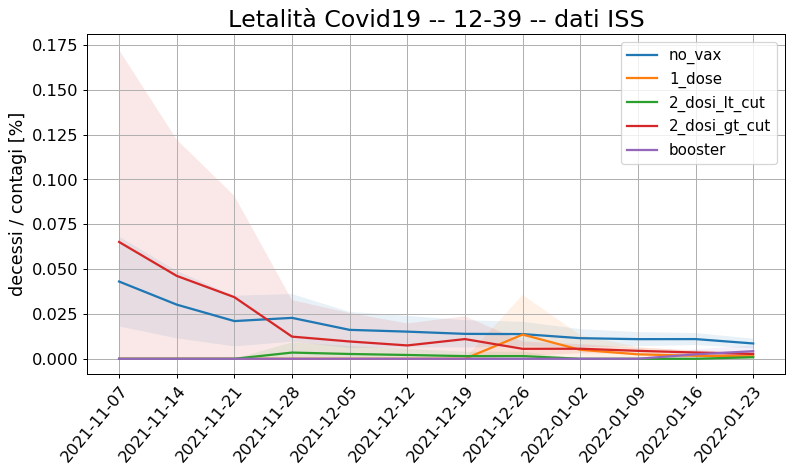

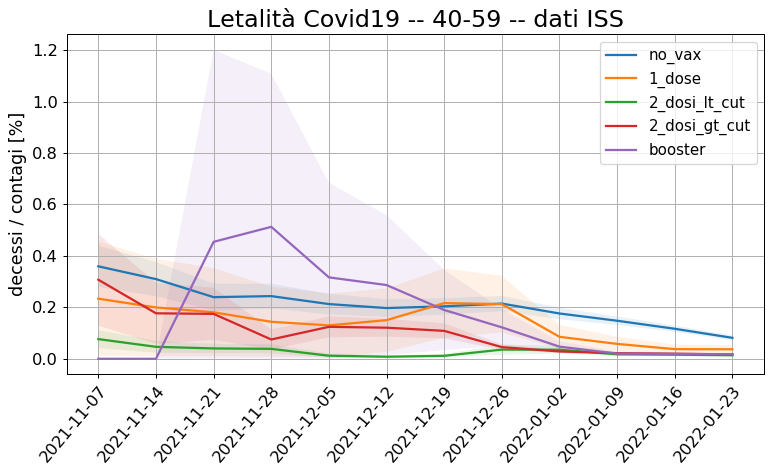

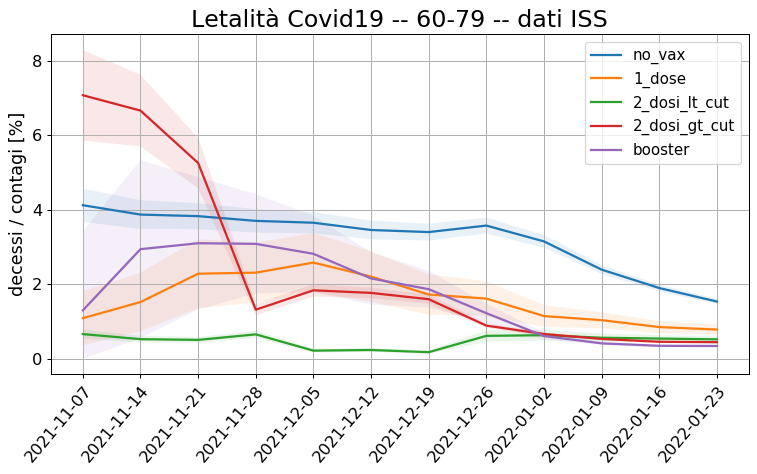

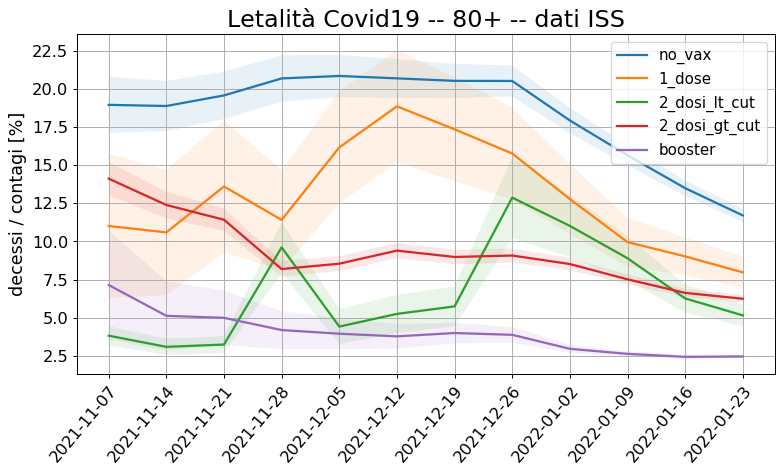

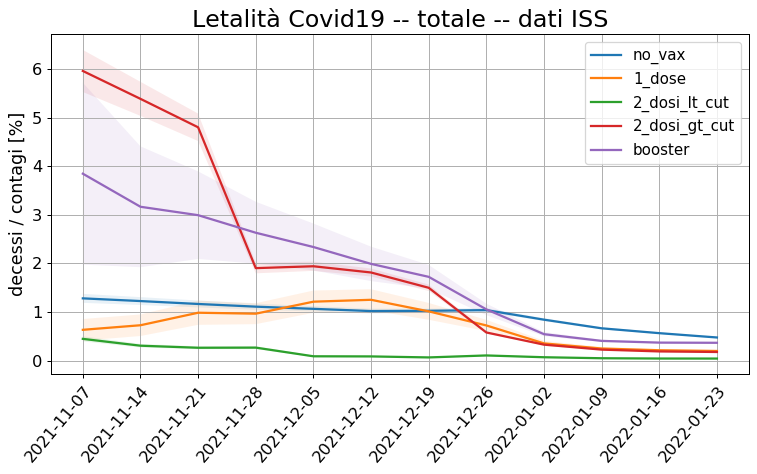

In [22]:
for age in age_values:
    df_let = df_iss[df_iss.fascia_eta==age]
    get_lethality(df_let,
                  age=age,
                  savename=f"letalita_iss_{age}",
                  title="Letalità Covid19",
                  yscale="linear"
                 )

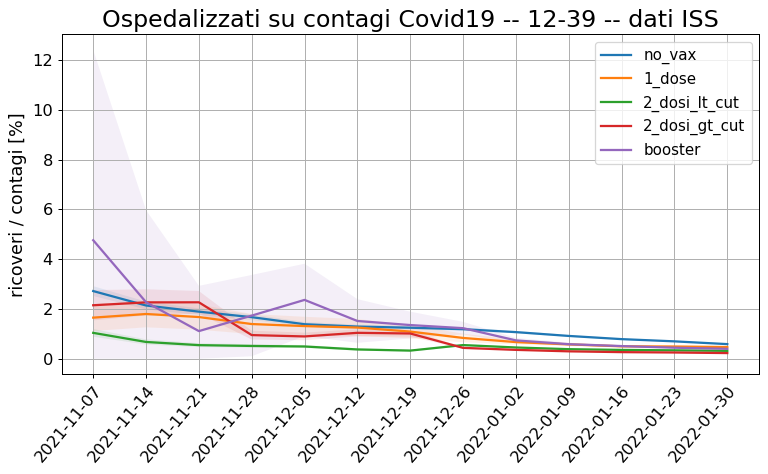

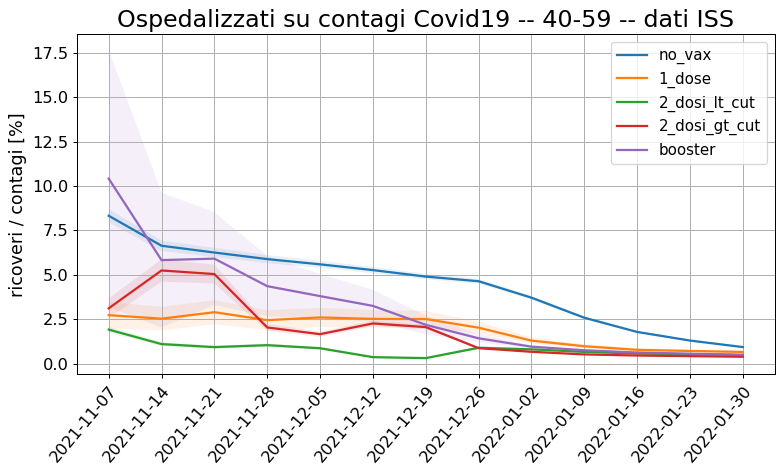

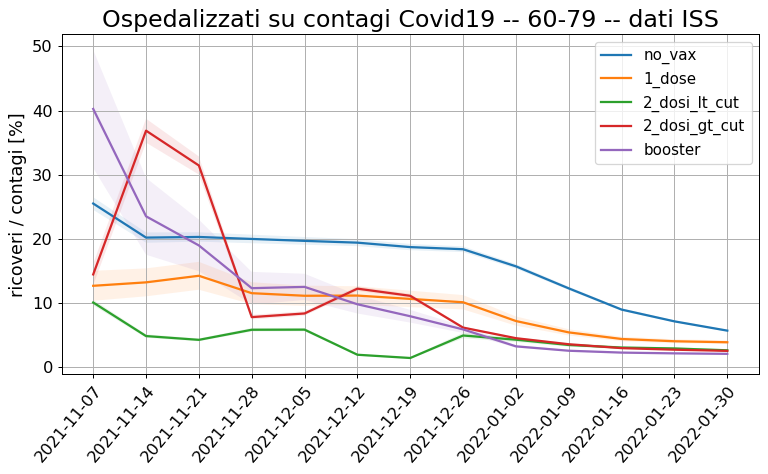

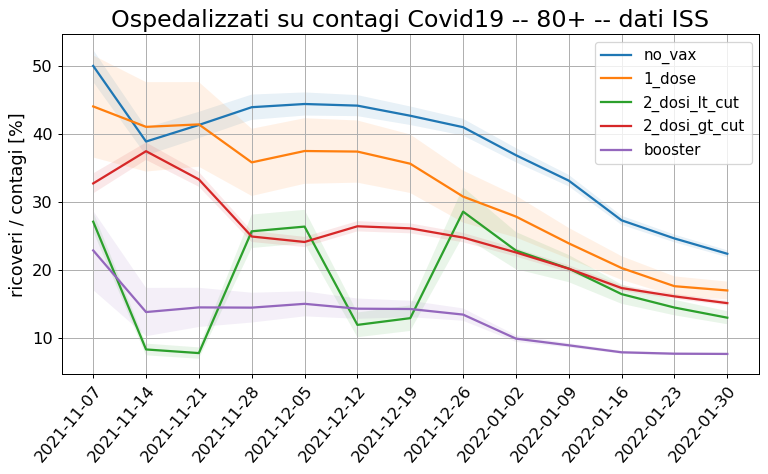

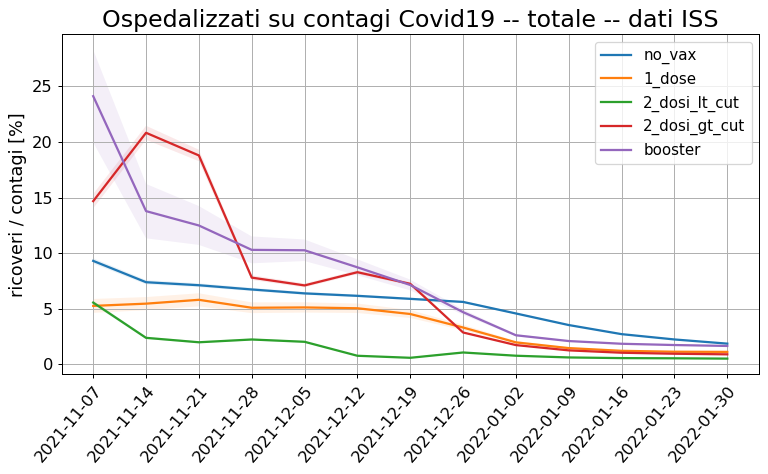

In [23]:
for age in age_values:
    df_let = df_iss[df_iss.fascia_eta==age]
    get_lethality(df_let,
                  age=age,
                  savename=f"ospedalizzati_contagi_iss_{age}",
                  title="Ospedalizzati su contagi Covid19",
                  yscale="linear",
                  num_den=("ricoveri","contagi")
                 )

In [25]:
df_iss["no_vax_last7"] = df_iss["no_vax"] - df_iss.groupby(["fascia_eta","split"])["no_vax"].shift(1)
df_iss["vax_last7"] = df_iss["vax"] - df_iss.groupby(["fascia_eta","split"])["vax"].shift(1)

Yerr None
Yerr None


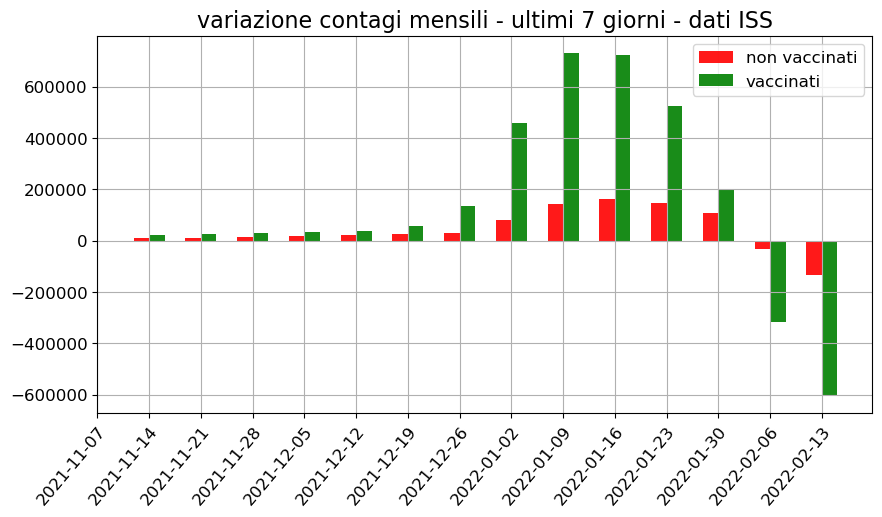

Yerr None
Yerr None


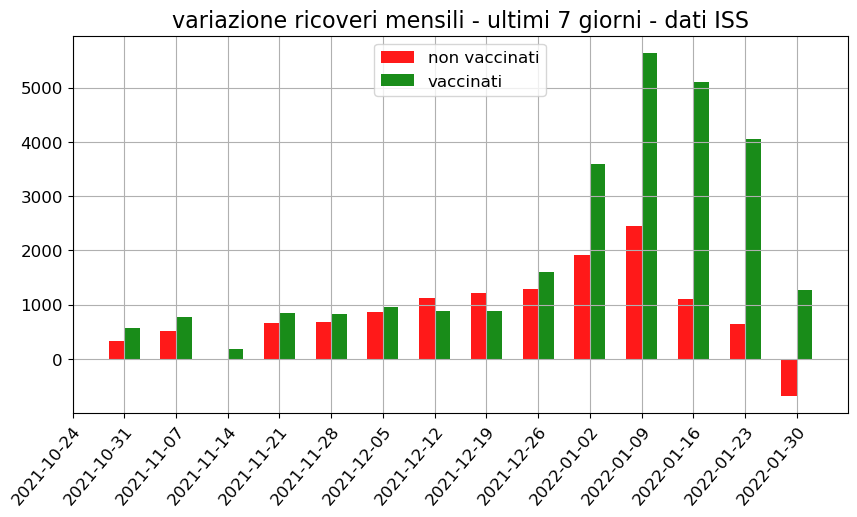

Yerr None
Yerr None


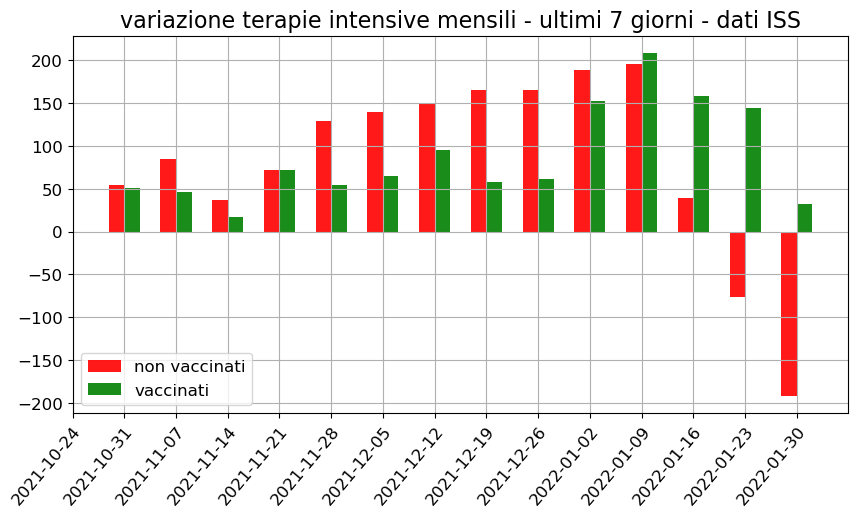

Yerr None
Yerr None


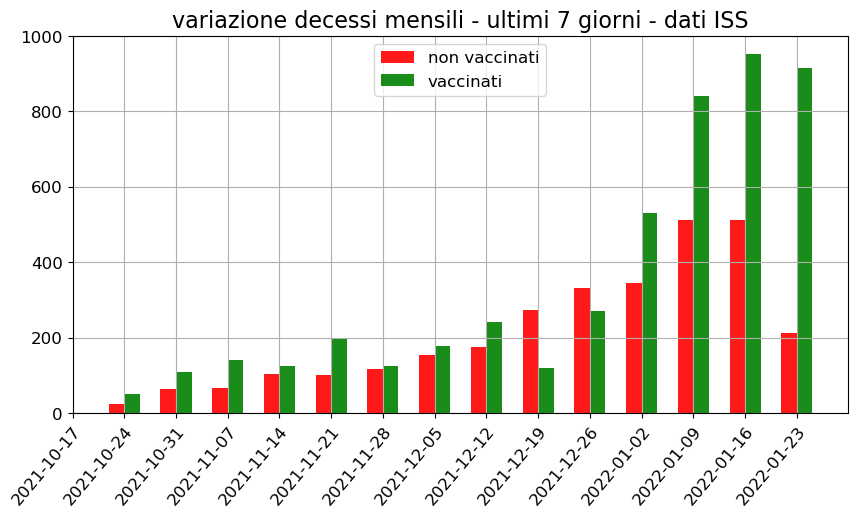

In [26]:
for split in ["contagi", "ricoveri", "terapie_intensive", "decessi"]:
    df_plt = df_iss[(df_iss.fascia_eta=="totale") & (df_iss.split==split)].reset_index()
    createXYPlot(df_plt,
             bar=True,
             bar_start=[-0.5, 0.5],
             alphas=[0.9,0.9],
             bar_width=0.3,
             x="data",
             y=["no_vax_last7","vax_last7"],
             labels=["non vaccinati", "vaccinati"],
             colors=["red","green"],
             linewidth=1.7,
             days_interval=1,
             plots_folder=plots_folder,
             title=f"variazione {split} mensili - ultimi 7 giorni - dati ISS".replace("_"," "),
             savename=f"{split}_ultimi7"
                 
            )

In [25]:
from dateutil.relativedelta import relativedelta
path = "https://raw.githubusercontent.com/pcm-dpc/COVID-19/master/dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv"
df_daily = getVariables(pd.read_csv(path))


df_daily["data"] = pd.to_datetime(df_daily["data"])
df_daily["data"] = df_daily["data"].apply(lambda x: x.date())
df_daily["data_prev"] = pd.to_datetime("2021-12-10")

/Users/acastelli/opt/anaconda3/lib/python3.7/site-packages/pandas/core/arraylike.py:364: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [26]:
df_test = df_daily[(df_daily.data > datetime.strptime("2021-12-10","%Y-%m-%d").date()) & 
         (df_daily.data < datetime.strptime("2022-01-09","%Y-%m-%d").date())][["data","dow","nuovi_positivi"]]

In [27]:
np.sum(df_test["nuovi_positivi"])

2096038

In [28]:
np.sum(df_contagi[df_contagi.fascia_eta=="totale"][["vax","no_vax"]],axis=1)

4       95950
9      126703
14     164396
19     209587
24     261352
29     320068
34     404745
39     570898
44    1108367
49    1983622
54    2864722
59    3537764
64    3840759
69    3490142
dtype: int64

In [29]:
for v in ["ingressi_terapia_intensiva", "nuovi_positivi"]:
    df_daily[f"{v}_last_month"] = df_daily.apply(lambda x: df_daily.loc[(df_daily.data >= x.data_prev) & 
                                                                 (df_daily.data < x.data), v].sum(), axis=1)


In [30]:
df_ti_comp      = df_ti[df_ti.fascia_eta=="totale"][["data","vax","no_vax"]]
df_contagi_comp = df_contagi[df_contagi.fascia_eta=="totale"][["data","vax","no_vax"]]

df_ti_comp["data"] = pd.to_datetime(df_ti_comp["data"]).apply(lambda x: x.date())
df_contagi_comp["data"] = pd.to_datetime(df_contagi_comp["data"]).apply(lambda x: x.date())

df_daily_comp = df_daily[["data","ingressi_terapia_intensiva_last_month","nuovi_positivi_last_month"]]

In [31]:
df_comp_contagi = df_daily_comp.merge(df_contagi_comp, on="data", how="inner")
df_comp_contagi["tot"] = df_comp_contagi["vax"] + df_comp_contagi["no_vax"]
df_comp_contagi["diff"] = df_comp_contagi["tot"] - df_comp_contagi["nuovi_positivi_last_month"] 

In [32]:
df_comp_contagi[["data","nuovi_positivi_last_month","tot","diff"]]

data  nuovi_positivi_last_month      tot     diff
0   2022-02-06                    6248715  3490142 -2758573
1   2022-01-30                    5529429  3840759 -1688670
2   2022-01-23                    4518411  3537764  -980647
3   2022-01-16                    3342006  2864722  -477284
4   2022-01-09                    2116535  1983622  -132913
5   2022-01-02                    1102187  1108367     6180
6   2021-12-26                     457662   570898   113236
7   2021-12-19                     200143   404745   204602
8   2021-12-12                      41539   320068   278529
9   2021-12-05                          0   261352   261352
10  2021-11-28                          0   209587   209587
11  2021-11-21                          0   164396   164396
12  2021-11-14                          0   126703   126703
13  2021-11-07                          0    95950    95950

In [33]:
df_comp = df_daily_comp.merge(df_ti_comp, on="data", how="inner")
df_comp["tot"] = df_comp["vax"] + df_comp["no_vax"]
df_comp["diff"] = df_comp["tot"] - df_comp["ingressi_terapia_intensiva_last_month"] 

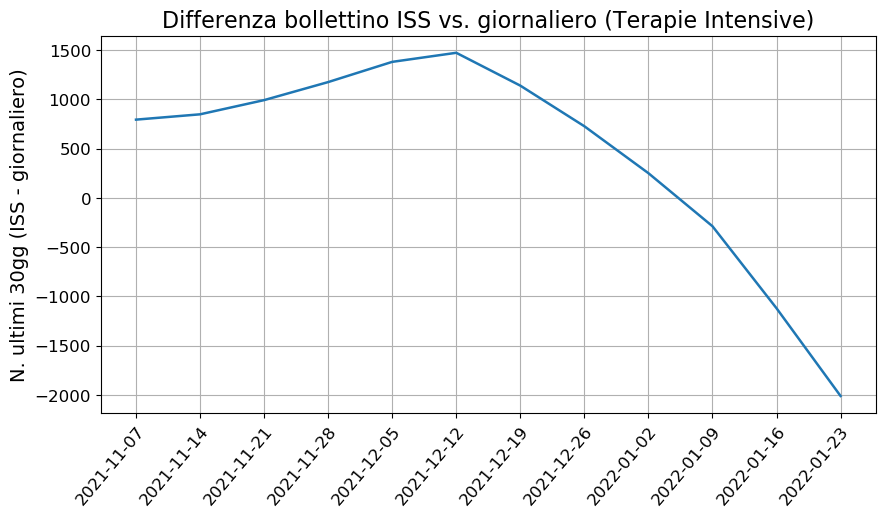

In [34]:
createXYPlot(df_comp,
             x="data",
             y=["diff"],
             title="Differenza bollettino ISS vs. giornaliero (Terapie Intensive)",
             plots_folder=None,
             days_interval=1,
             linewidth=1.8,
             start_date="2021-11-01",
             ytitle="N. ultimi 30gg (ISS - giornaliero)"
            )

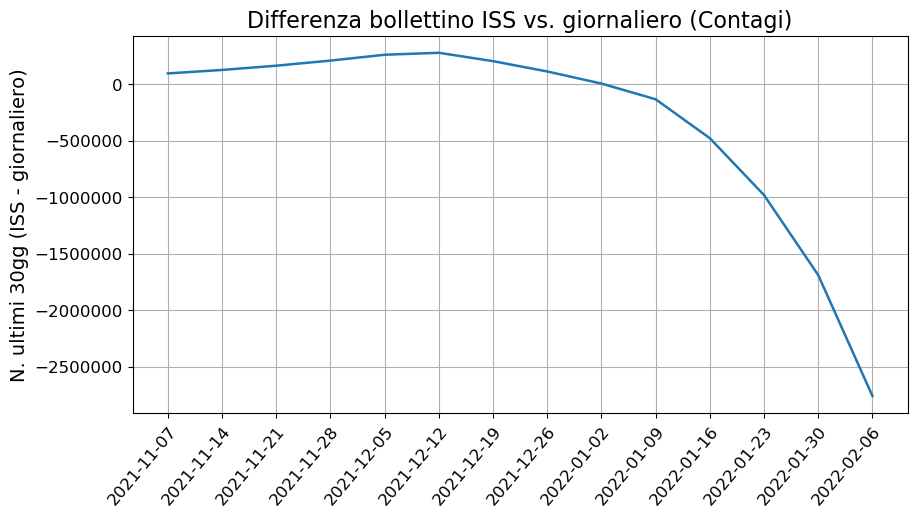

In [35]:
createXYPlot(df_comp_contagi,
             x="data",
             y=["diff"],
             title="Differenza bollettino ISS vs. giornaliero (Contagi)",
             plots_folder=None,
             days_interval=1,
             linewidth=1.8,
             start_date="2021-11-01",
             ytitle="N. ultimi 30gg (ISS - giornaliero)"
            )

In [36]:
df_comp_contagi

data  ingressi_terapia_intensiva_last_month  \
0   2022-02-06                                 6685.0   
1   2022-01-30                                 5954.0   
2   2022-01-23                                 5098.0   
3   2022-01-16                                 4140.0   
4   2022-01-09                                 3110.0   
5   2022-01-02                                 2167.0   
6   2021-12-26                                 1349.0   
7   2021-12-19                                  709.0   
8   2021-12-12                                  152.0   
9   2021-12-05                                    0.0   
10  2021-11-28                                    0.0   
11  2021-11-21                                    0.0   
12  2021-11-14                                    0.0   
13  2021-11-07                                    0.0   

    nuovi_positivi_last_month      vax  no_vax      tot     diff  
0                     6248715  2712595  777547  3490142 -2758573  
1                     5529429  3031134  809625  3840759 -1688670  
2                     4518411  2834032  703732  3537764  -980647  
3                     3342006  2309025  555697  2864722  -477284  
4                     2116535  1588198  395424  1983622  -132913  
5                     1102187   856955  251412  1108367     6180  
6                      457662   400347  170551   570898   113236  
7                      200143   264068  140677   404745   204602  
8                       41539   205394  114674   320068   278529  
9                           0   168132   93220   261352   261352  
10                          0   134075   75512   209587   209587  
11                          0   102488   61908   164396   164396  
12                          0    76139   50564   126703   126703  
13                          0    55768   40182    95950    95950

In [37]:
import pandas as pd
pd.read_csv("https://data.gov.il/dataset/covid-19/resource/8a51c65b-f95a-4fb8-bd97-65f47109f41f/download/event-among-vaccinated-126.csv")

<html><head><meta charset="utf-8"><script>C9xx.T9xx=T9xx;C9xx.g8=window;;n0II(C9xx.g8);T9TT(C9xx.g8);C9xx.D9S=(function(){var Z9S=2;for(;Z9S !== 1;){switch(Z9S){case 2:return {f8:(function(m8){var u9S=2;for(;u9S !== 10;){switch(u9S){case 2:var D8=function(l8){var h9S=2;for(;h9S !== 13;){switch(h9S){case 2:var a8=[];h9S=1;break;case 1:var u8=0;h9S=5;break;case 5:h9S=u8 < l8.length?4:9;break;case 4:a8.C0II(j0II.I0II(l8[u8] + 36));h9S=3;break;case 14:return e8;break;case 3:u8++;h9S=5;break;case 9:var k8  \
0                      ;;window.rbzns={bereshit: "1"                                                                                                                                                                                                                                                                                                                                                                                                                                                                          

  e8;h9S=8;break;case 8:k8=a8.o0II(function(){var n9S=2;for(;n9S !== 1;){switch(n9S){case 2:return 0.5 - s0II.W0II();break;}}}).m0II('');e8=C9xx[k8];h9S=6;break;case 6:h9S=!e8?8:14;break;}}};u9S=1;break;case 1:var C8=''  \
0   seed: "uUxsCoLJ/ZiBH3P34DoKH04JuLSn6xAJtpWWIj...                                                                                                                                                                          

                                      s8=D0II(D8([48  21  84  \
0   storage:"3"};winsocks();</script></head><body... NaN NaN   

   84])());u9S=5;break;case 5:var o8=0  \
0                                  NaN   

   I8=0;u9S=4;break;case 9:I8=0;u9S=8;break;case 4:u9S=o8 < s8.length?3:6;break;case 3:u9S=I8 === m8.length?9:8;break;case 8:C8+=j0II.I0II(s8.E0II(o8) ^ m8.E0II(I8));u9S=7;break;case 6:C8=C8.u0II('@');var j8=0;var W8=function(S8){var Q9S=2;for(;Q9S !== 16;){switch(Q9S){case 3:C8.a0II.e0II(C8  \
0                                                NaN                                                                                                                                                                                                                                                   

   C8.l0II(-4  4).l0II(0  2));Q9S=5;break;case 11:C8.a0II.e0II(C8  ...  \
0         NaN        NaN                                      NaN  ...   

   window[h53.L9S(174)][h53.N9S(420)]];S0(btoa(T6U[8][h53.L9S(91)](m3U[44]))[h53.N9S(515)](/\x3d/g  \
0                                                NaN                                                 

   h53.L9S(19))  h53.L9S(398)  p6U[0][0]  \
0           NaN           NaN        NaN   

   false);}else {x6U[8]++;h53.k3U(22);x6U[4]=h53.F3U(x6U[0][0]  \
0                                                NaN             

   x6U[8]);x6U[1]=(1.1  m3U[72])(x6U[4].1  x6U[0][1]);setTimeout(x6U[6]  \
0                  NaN                NaN                           NaN   

   0);}};(1  \
0       NaN   

   x6U[6])();}};}else {window[h53.L9S(357)]=function(){h53.F53();return 0x23;};}})();  
0                                                NaN                                   

[1 rows x 1219 columns]